<a href="https://colab.research.google.com/github/Makrufkasr/Bank_Marketing_Campaign_Using_Machine_Learning/blob/main/Bank_Marketing_Campaign_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Campaign (Direct Phone Calls) - Opening Deposit

**Business Problem**

Terdapat masalah kampanye di bank tersebut, dimana belum dapat berjalan secara efektif, karena dari 11.162 nasabah hanya 47,4% nasabah yang membuka deposito

**Objective**

1. Memprediksi conversion rate nasabah yang membuka deposito berdasarkan hasil Machine learning.
2. Memberikan rekomendasi untuk target pelanggan dan metode untuk mengimplementasikan kampanye tersebut berdasarkan Exploratory Data Analysis

## Dataset 
https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

In [144]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

#Evaluation 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score)
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

#Statistic
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Reject Warnings
import warnings
warnings.filterwarnings('ignore')

In [140]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [141]:
# Function untuk check data

def data_info(data) :
  missing_values = data.isnull().sum()
  missing_perc = (missing_values/len(data))*100
  data_type = data.dtypes
  num_unique = data.nunique()

  print(f'Jumlah Row dan Columns : {data.shape}')
  print(f'Duplicated Values : {data.duplicated().sum()}')

  return pd.DataFrame({'Missing_Value' : missing_values,
                       'Missing_Value_(%)' : missing_perc,
                       'Data_Type' : data_type,
                       'Number_Of_Unique' : num_unique}).sort_values('Missing_Value_(%)', ascending = False)


## Function untuk melakukan uji statistik

In [142]:
# Chi-Square
def uji_chisquare (x,y) :
    
    obs_x = pd.crosstab(x_train[x],x_train[y])
    chi2, p, dof, expected = chi2_contingency(obs_x)
    alpha = 0.05

    
    if p<alpha :
        print (f'===== {x} =====')
        print('Number Expected :')
        print(expected)
        print()
        print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTerdapat perbedaan target yang signifikan dari segi predictor')
        print()
        
    else : 
        print (f'===== {x} =====')
        print('Number Expected :')
        print(expected)
        print()
        print (f'Chi-square Statistic : {chi2} ,p-value: {p} lebih dari {alpha} \nTerdapat perbedaan target yang signifikan dari segi predictor')
        print()

In [143]:
# Annova (t-test)
def uji_annova (x) :
    deposit_yes = x_train[x_train['deposit']==1][x]
    deposit_no  = x_train[x_train['deposit']==0][x]

    alpha = 0.05
    ftest,p_value = f_oneway(deposit_yes,deposit_no)

    if p_value < alpha :
        print(x)
        print(f'Kesimpulan : nilai p_value {p_value} kurang dari alpha {alpha}, nilai ftest = {ftest}')
        print('Terdapat perbedaan target yang signifikan dari segi predictor')
        print()

    else :
        print(x)
        print(f'Kesimpulan : nilai p_value {p_value} lebih dari alpha {alpha}, nilai ftest = {ftest}')
        print('Tidak terdapat perbedaan target yang signifikan dari segi predictor')
        print()

In [13]:
data_info(df)

Jumlah Row dan Columns : (11162, 17)
Duplicated Values : 0


,Missing_Value,Missing_Value_(%),Data_Type,Number_Of_Unique
age,0,0.0,int64,76
day,0,0.0,int64,31
poutcome,0,0.0,object,4
previous,0,0.0,int64,34
pdays,0,0.0,int64,472
campaign,0,0.0,int64,36
duration,0,0.0,int64,1428
month,0,0.0,object,12
contact,0,0.0,object,3
job,0,0.0,object,12


In [14]:
#Let's check typos data
for x in df.columns :
  print(f'Column : {x}')
  print(f'{df[x].unique()}')
  print()

Column : age
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]

Column : job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

Column : marital
['married' 'single' 'divorced']

Column : education
['secondary' 'tertiary' 'primary' 'unknown']

Column : default
['no' 'yes']

Column : balance
[2343   45 1270 ... 1594 2593 -134]

Column : housing
['yes' 'no']

Column : loan
['no' 'yes']

Column : contact
['unknown' 'cellular' 'telephone']

Column : day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]

Column : month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column : duration
[1042 1467 1389 ... 1504  818 1812]

Column : campaign
[ 1 

**Observation**

- Data terdiri dari 17 column dan 11.162 baris
- Tidak ada duplicated value
- Tidak ada missing value
- Drop column contact karna kita asumsikan tidak ada perbedaan antara phone dan cellular
- Drop column poutcome dan duration karna nilai pada feature ini akan muncul setelah aktivitas campaign dilakukan
Mengganti data feature deposit menjadi 1,0 (1=yes, 0=no)

In [15]:
# delete irrelevant columns, not suitable with our purpose
df.drop(['duration','poutcome','contact'], axis = 1, inplace =True)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,2,-1,0,yes


In [16]:
# Function for Checking Outlier

def outlier(df,column) : 
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3-q1
  Lower = q1 - (1.5*iqr)
  Upper = q3 + (1.5*iqr)

  Outlier_list = df[column].apply(lambda x: 'outlier' if x < Lower or x > Upper else 'not outlier')
  print(f'outiler lower limit : {Lower}\n outlier upper limit :{Upper}')
  return Outlier_list

In [17]:
deposit = df['deposit'].value_counts(normalize=True)
print(deposit)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64


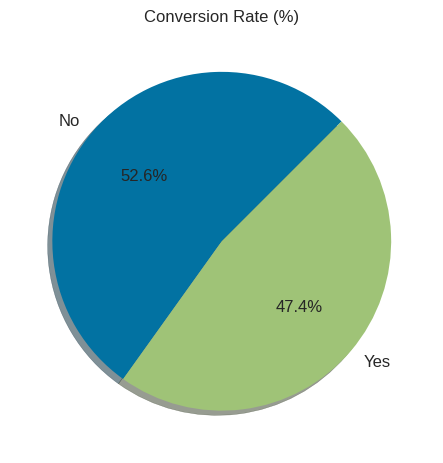

In [18]:
plt.pie(deposit, labels=['No','Yes'],
        shadow=True,
        autopct='%1.1f%%',
        startangle=45,
        textprops={'fontsize': 12})
plt.title('Conversion Rate (%)')
plt.show()

In [19]:
# dataset for train and target
dfnew = df.copy()

#replace data pada deposit
dfnew['deposit'].replace(['yes','no'],[1,0],inplace=True)

# Seperate data between for train test and target test
x = dfnew.iloc[:,:-1]
y = dfnew.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state = 42)

In [20]:
#insert 'deposit' pada X_train dan X_test untuk memudahkan 
x_train['deposit'] = y_train
x_test['deposit'] = y_test

In [21]:
data_info(x_train)

Jumlah Row dan Columns : (7813, 14)
Duplicated Values : 0


,Missing_Value,Missing_Value_(%),Data_Type,Number_Of_Unique
age,0,0.0,int64,75
job,0,0.0,object,12
marital,0,0.0,object,3
education,0,0.0,object,4
default,0,0.0,object,2
balance,0,0.0,int64,3191
housing,0,0.0,object,2
loan,0,0.0,object,2
day,0,0.0,int64,31
month,0,0.0,object,12


Observation 
1. Terdapat 14 columns
2. Jumlah rows sebanyak 7813 yang mana data tersebut 70% dari Dataframe awal

## Descriptive Statistics

In [22]:
#Catgorical columns
numeric_columns = x_train.select_dtypes(include=['int', 'float']).columns
x_train[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,7813.0,41.237169,11.850243,18.0,32.0,39.0,49.0,95.0
balance,7813.0,1536.787278,3215.999050,-3058.0,124.0,553.0,1730.0,81204.0
day,7813.0,15.605273,8.419817,1.0,8.0,15.0,21.0,31.0
campaign,7813.0,2.499552,2.722798,1.0,1.0,2.0,3.0,63.0
pdays,7813.0,49.952643,107.826919,-1.0,-1.0,-1.0,-1.0,854.0
previous,7813.0,0.802253,2.135139,0.0,0.0,0.0,0.0,41.0
deposit,7813.0,0.471266,0.499206,0.0,0.0,0.0,1.0,1.0


Observation 
- Berdasarkan rata-rata umur diatas user kita memiliki umur 41 tahun, paling uda berumur 18 tahun dan paling tua adalah 95 Tahun
- Rata-rata balance user kita adalah $1528 dan paling kecil adalah (-6847)  jika balance bernilai negatif berarti memiliki hutang, dan paling besar $81204
- Rata-rata jumlah campaign adalah 3, jumlah minimal 1 dan jumlah maksimal 63
- 75% nasabah tidak pernah dikontak oleh bank (pdays=jumlah hari terakhir dikontak dan previous=jumlah kontak sebelum campaign). Maksud dari angka 0 dan -1 adalah tidak pernah dikontak. Untuk analisa selanjutnya, kita akan menggunakan column baru is_contact untuk merepresentativkan feature pdays dan previous



In [23]:
# Numerical columns
cat_columns = x_train.select_dtypes(include = ['object']).columns
x_train[cat_columns].describe().T

,count,unique,top,freq
job,7813,12,management,1819
marital,7813,3,married,4431
education,7813,4,secondary,3788
default,7813,2,no,7701
housing,7813,2,no,4157
loan,7813,2,no,6770
month,7813,12,may,1972


**Observation**

1. Almost all of our customers, their job are management
2. Almost all of our customers, their have married
3. Almost all of our customers, their have passed secondary education
4. Almost all of our customers, their the last called in may

In [24]:
# Visualisasi data category dicompare dengan category
def cat_cat(i,j) :
  ax = ((x_train.groupby([i])[j].mean())/(x_train.groupby([i])[j].mean().sum())*100).plot(kind = 'bar', figsize = (6,6))
  abs_value = round(((x_train.groupby([i])[j].mean())/(x_train.groupby([i])[j].mean().sum())*100))
  ax.bar_label(container = ax.containers[0], labels = abs_value)

  plt.xticks(rotation = 0);
  plt.ylabel('Conversion Rate(%)', fontsize = 12)
  plt.xlabel(i, fontsize = 12)
  plt.title(f'{i} vs Conversion Rate (%)',fontsize = 12)
  plt.ylim(0,100)

  plt.show()

In [25]:
# Visualisasi data number dicompare dengan category
def num_cat (a,b):
  ax = (x_train.groupby([b])[a].median()).plot(kind = 'bar', figsize = (6,6))
  abs_value = round((x_train.groupby([b])[a].median()),1)
  ax.bar_label(container= ax.containers[0], labels = abs_value)

  plt.xticks(rotation=0);
  plt.xlabel(a, fontsize=12)
  plt.ylabel(b, fontsize=12)
  plt.title(f'{a} vs {b}', fontsize =12)
  plt.ylim(0, max(abs_value)+100)


##EDA

### 1.1 Age Vs Conversion rate



<function matplotlib.pyplot.show(close=None, block=None)>

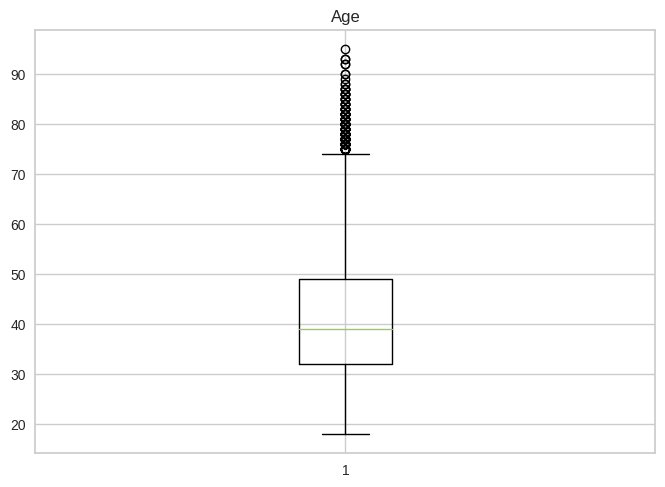

In [26]:
#Check boxplot umur

plt.boxplot(df['age'])
plt.title('Age')
plt.show

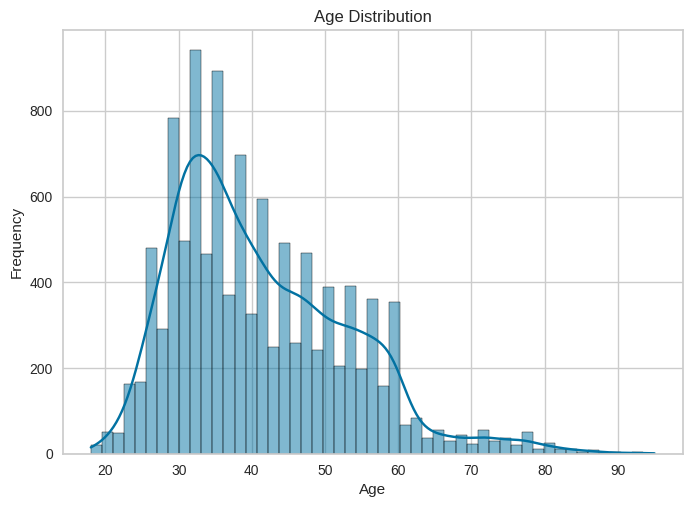

In [27]:
sns.histplot(dfnew['age'], kde=True, edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the chart
plt.show()

In [28]:
#cek outlier
x_train['outlier_age'] = outlier(x_train,'age')
x_train[x_train['outlier_age']=='outlier'].head(10)

outiler lower limit : 6.5
 outlier upper limit :74.5


,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,outlier_age
3130,77,retired,married,tertiary,no,7802,no,no,1,feb,2,-1,0,1,outlier
1487,76,housemaid,divorced,primary,no,1411,no,no,15,apr,3,-1,0,1,outlier
3014,79,retired,married,primary,no,3025,no,no,11,dec,3,126,3,1,outlier
3945,84,retired,married,tertiary,no,4761,no,no,9,sep,1,92,3,1,outlier
1603,75,retired,married,tertiary,no,2991,no,no,22,apr,1,-1,0,1,outlier
2823,76,retired,married,secondary,no,4112,no,no,23,oct,2,-1,0,1,outlier
2885,76,retired,married,primary,no,1492,no,no,3,nov,1,-1,0,1,outlier
6227,75,retired,divorced,secondary,no,2199,no,no,13,nov,1,-1,0,0,outlier
5799,77,retired,divorced,primary,no,639,no,no,16,apr,7,-1,0,0,outlier
1582,95,retired,divorced,primary,no,2282,no,no,21,apr,17,-1,0,1,outlier


In [29]:
(x_train['outlier_age'].value_counts(normalize=True))*100

not outlier    98.528094
outlier         1.471906
Name: outlier_age, dtype: float64

In [30]:
#Drop feature outlier_age
x_train.drop('outlier_age',axis =1 , inplace =True)

**Observation**

Observation
Karna ada beberapa manusia yang berumur panjang yang memiliki umur sampai 95 tahun, sehingga data outlier feature age merupakan data yang masih make sense.Selain itu data outlier mengandung informasi pada feature lain, jadi data outlier pada feature age masih dipertahankan


In [31]:
# Makes bins for age

Kita akan melakukan analisa umur berdasarkan pengelompokkan umur yang productif dan tidak terhdap conversion rate
1. Average of retirement age is 60+
2. Productive age and havent married (21-30)
3. Productive age and have married ( 30-50)


In [32]:
def bin_umur(x) :
  if x < 30 :
    return '21-30'
  elif x < 40 :
    return '31-40'
  elif x < 50 :
    return '41-50'
  elif x <60 :
    return '51-60'
  else :
    return '60+'

In [33]:
x_train['age_cat'] = x_train['age'].apply(bin_umur)
#Check unique values
x_train['age_cat'].unique()

array(['51-60', '31-40', '41-50', '21-30', '60+'], dtype=object)

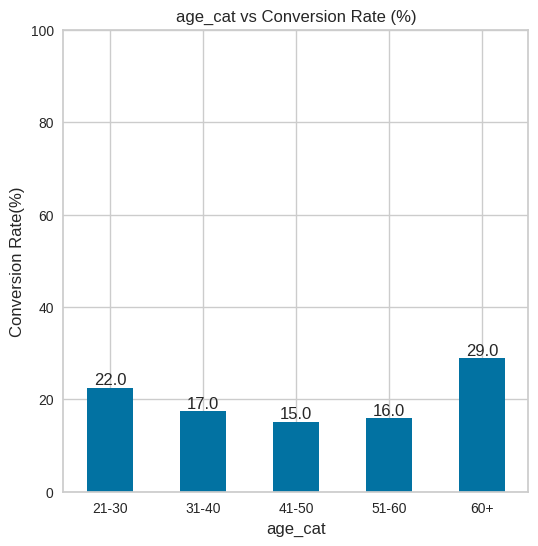

In [34]:
cat_cat('age_cat','deposit')

In [35]:
uji_annova('age')

age
Kesimpulan : nilai p_value 0.006925639874187236 kurang dari alpha 0.05, nilai ftest = 7.296025947954262
Terdapat perbedaan target yang signifikan dari segi predictor



In [36]:
uji_chisquare('age_cat','deposit')

===== age_cat =====
Number Expected :
[[ 573.14783054  510.85216946]
 [1589.37488801 1416.62511199]
 [ 991.90528606  884.09471394]
 [ 688.9406118   614.0593882 ]
 [ 287.63138359  256.36861641]]

Chi-square Statistic : 294.12167249366905 ,p-value: 2.0078465183470017e-62 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Berdasarkan barchat dan hasil uji statistik, dapat diketahui bahwa umur mempengaruhi conversion rate pembukaan deposit. Nasabah dengan usia pensiun yaitu kelompok umur 60+ memiliki kecenderungan membuka deposit paling besar dibandingkan yang lain (cr = 29.0%). Nasabah dengan usia produktif dan belum menikah memiliki kecenderungan membuka deposit lebih besar (cr usia 21-30 = 22.0% dan cr usia 31-40 = 17.0%) daripada nasabah dengan usia produktif tetapi sudah menikah (cr usia 41-60 = 15.0% dan cr usia 51-60 = 16.0%)


###1.2 Balance VS Conversion Rate 




<function matplotlib.pyplot.show(close=None, block=None)>

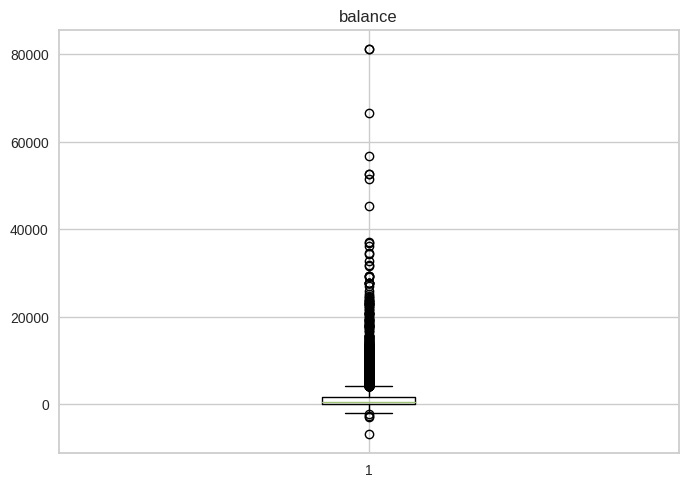

In [37]:
#Check boxplot umur

plt.boxplot(df['balance'])
plt.title('balance')
plt.show

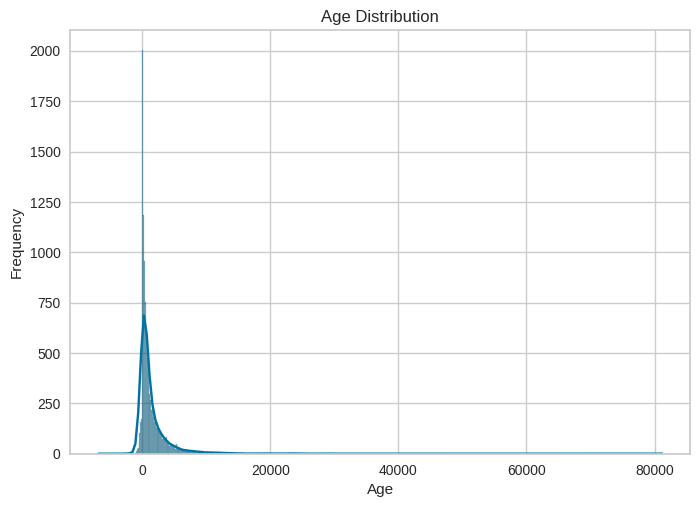

In [38]:
sns.histplot(dfnew['balance'], kde=True, edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the chart
plt.show()

In [39]:
#cek outlier
x_train['outlier_balance'] = outlier(x_train,'balance')
x_train[x_train['outlier_balance']=='outlier'].head(10)

outiler lower limit : -2285.0
 outlier upper limit :4139.0


,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,age_cat,outlier_balance
812,46,technician,single,tertiary,no,4414,no,no,18,aug,7,-1,0,1,41-50,outlier
1092,28,unknown,single,secondary,no,4465,no,no,28,jan,1,-1,0,1,21-30,outlier
5339,49,entrepreneur,single,secondary,no,5802,no,no,12,aug,3,104,2,0,41-50,outlier
5426,53,management,divorced,tertiary,no,6388,yes,no,23,jul,2,-1,0,0,51-60,outlier
10629,28,self-employed,single,tertiary,no,5215,no,no,2,jun,1,-1,0,0,21-30,outlier
3130,77,retired,married,tertiary,no,7802,no,no,1,feb,2,-1,0,1,60+,outlier
4881,53,blue-collar,married,secondary,no,6112,no,no,3,feb,1,-1,0,1,51-60,outlier
10992,45,blue-collar,married,primary,no,6691,no,no,13,aug,2,-1,0,0,41-50,outlier
4401,34,management,single,unknown,no,6013,yes,no,18,may,1,-1,0,1,31-40,outlier
2362,28,management,single,tertiary,no,12956,yes,no,2,jul,1,399,3,1,21-30,outlier


In [40]:
#Delete Tag Outlier
x_train.drop('outlier_balance', axis=1, inplace = True)

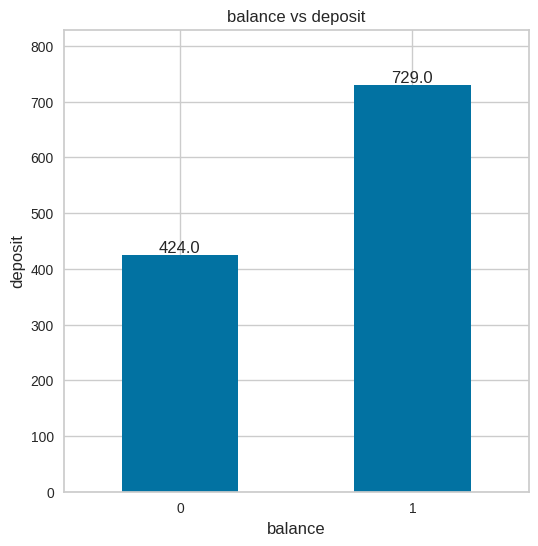

In [41]:
num_cat('balance','deposit')

In [42]:
#Check hubungan balance
uji_annova('balance')

balance
Kesimpulan : nilai p_value 2.2637765224193186e-10 kurang dari alpha 0.05, nilai ftest = 40.33095502390314
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Secara median,terdapat perbedaan 28.9% jumlah balance pada rekening nasabah yang cenderung membuka deposit dan tidak. Nasabah yang cenderung membuka deposit memiliki jumlah balance sebesar 729 dollar, sedangkan nasabah yang tidak membuka deposito hanya sebesar 424 dollar



###1.3 Loan vs Conversion Rate






Personal Loan vs Conversion Rate


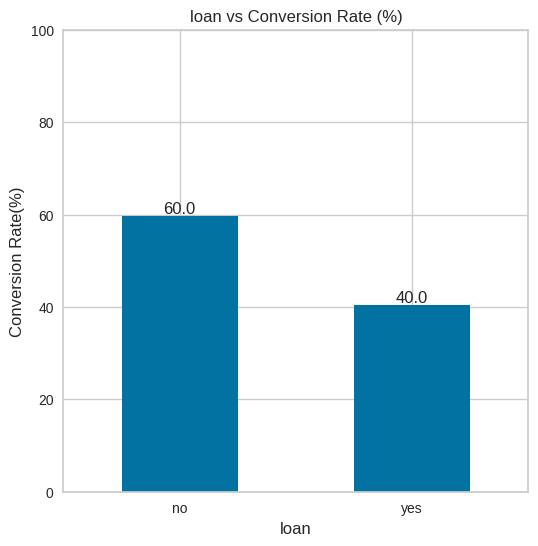

In [43]:
cat_cat('loan','deposit')

In [44]:
uji_chisquare('loan','deposit')

===== loan =====
Number Expected :
[[3579.53027006 3190.46972994]
 [ 551.46972994  491.53027006]]

Chi-square Statistic : 92.1189685795012 ,p-value: 8.16192772003411e-22 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Berdasarkan barchart dan hasil uji statistik, dapat diketahui bahwa personal loan mempengaruhi conversion rate. Nasabah yang tidak memiliki personal loan cenderung ingin membuka deposit (cr = 60%) dibandingkan nasabah yang memiliki pinjaman (cr=40%)



Mortage_loan vs Conversion Rate

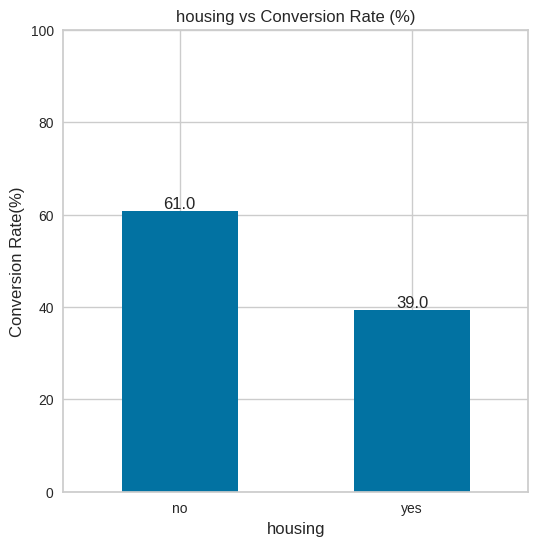

In [45]:
cat_cat('housing','deposit')

In [46]:
uji_chisquare('housing','deposit')

===== housing =====
Number Expected :
[[2197.94790733 1959.05209267]
 [1933.05209267 1722.94790733]]

Chi-square Statistic : 306.5205996614736 ,p-value: 1.2508413757464674e-68 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



Total Loan Vs Conversion rate

In [47]:
x_train['housing'] = x_train['housing'].replace(['yes','no'],[1,0])
x_train['loan'] = x_train['loan'].replace(['yes','no'],[1,0])
x_train['total_loan'] = x_train['housing'] + x_train['loan']
x_train['total_loan'].unique()


array([1, 0, 2])

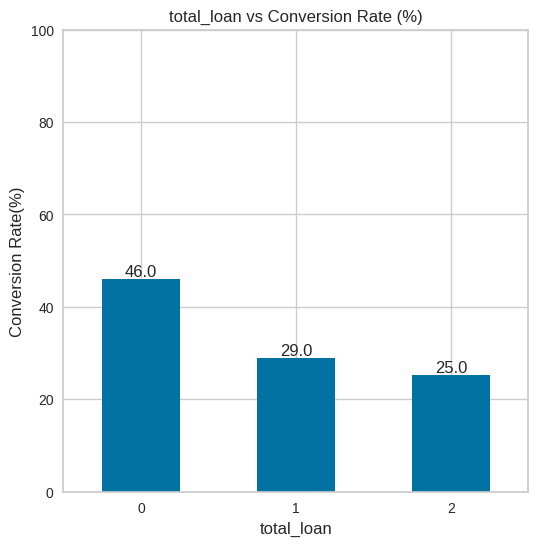

In [48]:
cat_cat('total_loan','deposit')

In [49]:
uji_chisquare('total_loan','deposit')

===== total_loan =====
Number Expected :
[[1959.48880072 1746.51119928]
 [1858.50057596 1656.49942404]
 [ 313.01062332  278.98937668]]

Chi-square Statistic : 407.9979482372164 ,p-value: 2.5372965348986265e-89 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Dari analisa diatas, kita tahu bahwa nasabah yang tidak memiliki personal pinjaman dan cicilan rumah/mortgage loan cenderung ingin membuka deposit. Dan hal itu selaras dengan barchart hubungan total loan dan conversion rate, dimana semakin banyak jumlah pinjaman nasabah maka semakin kecil kecenderungan nasabah untuk membuka deposit



###1.4 Gagal Bayar vs Conversion rate

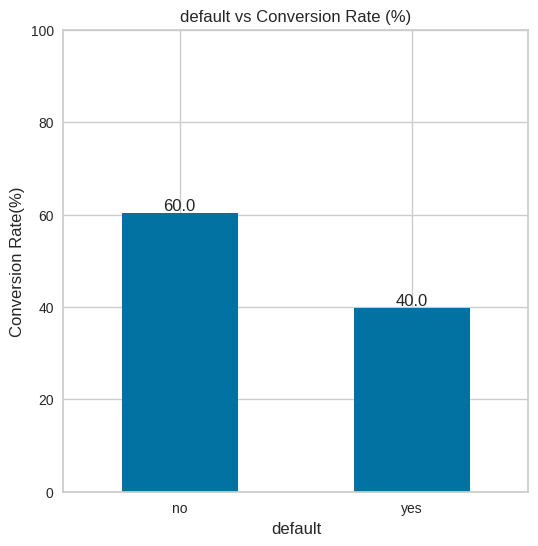

In [50]:
cat_cat('default','deposit')

In [51]:
uji_chisquare('default','deposit')

===== default =====
Number Expected :
[[4071.78177397 3629.21822603]
 [  59.21822603   52.78177397]]

Chi-square Statistic : 10.857403769812722 ,p-value: 0.0009840155129730744 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Hasil uji statistik dan barchart menunjukkan bahwa gagal bayar memiliki pengaruh terhadap conversion rate. Nasabah yang pernah gagal bayar memiliki kecenderungan membuka deposit (cr = 40%) lebih rendah dibandingkan nasabah yang bayar tagihan tepat waktu (cr=60%)



### 1.5 Pendidikan vs Conversion rate

In [52]:
(x_train['education'].value_counts(normalize=True))*100

secondary    48.483297
tertiary     33.777038
primary      13.285550
unknown       4.454115
Name: education, dtype: float64

In [53]:
#replace unknown dgn modus (secondary)
x_train['education'] =x_train['education'].replace('unknown','secondary')

In [54]:
x_train['education'].value_counts()

secondary    4136
tertiary     2639
primary      1038
Name: education, dtype: int64

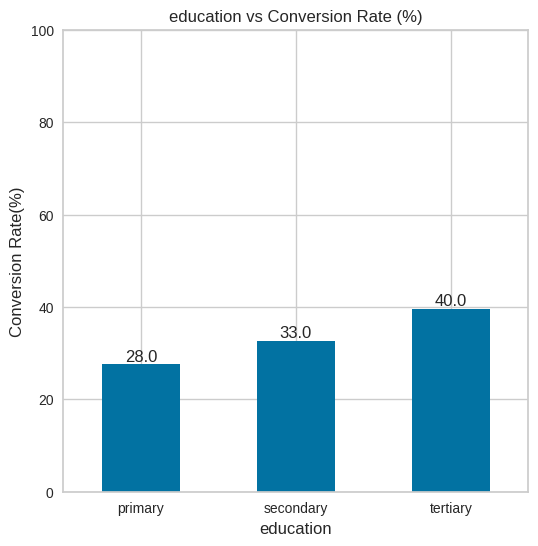

In [55]:
cat_cat('education','deposit')

In [56]:
uji_chisquare('education','deposit')

===== education =====
Number Expected :
[[ 548.82605913  489.17394087]
 [2186.84448995 1949.15551005]
 [1395.32945092 1243.67054908]]

Chi-square Statistic : 99.45308699184167 ,p-value: 2.5353420272856645e-22 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



Dari bachart dan hasil uji statistik, dapat disimpulkan bahwa pendidikan mempengaruhi conversion rate. Dimana semakin tinggi status pendidikan, semakin besar kecenderungan nasabah untuk membuka deposit. Convestion rate primary,secondary,tertiary adalah 28%, 33%, 40%



### 1.6 Pekerjaan vs Conversion rate

In [57]:
(x_train['job'].value_counts(normalize=True))*100

management       23.281710
blue-collar      17.240497
technician       16.139767
admin.           11.788046
services          8.293869
retired           6.988353
self-employed     3.929349
student           3.186996
unemployed        3.161398
entrepreneur      2.713426
housemaid         2.598234
unknown           0.678357
Name: job, dtype: float64

In [58]:
##grouping job berdasarkan persentase counts (dibawah 5%)
x_train['job'] =x_train['job'].replace(['entrepreneur','self-employed','student','unemployed','housemaid','unknown'],
                                       ['other','other','other','other','other','other'])

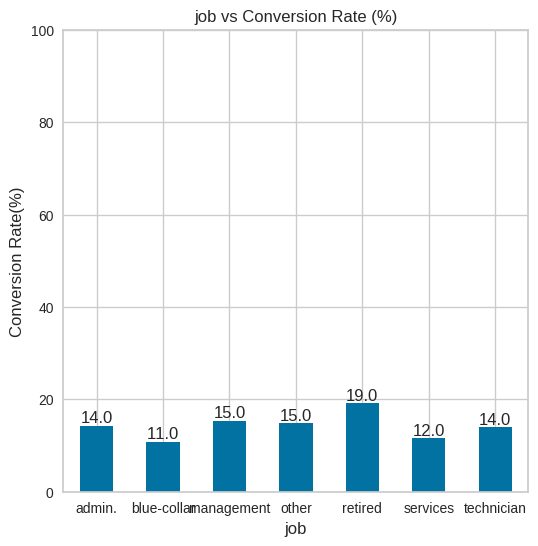

In [59]:
#hubungan pendidikan dengan conversion rate 
cat_cat('job','deposit')

In [60]:
uji_chisquare('job','deposit')

===== job =====
Number Expected :
[[486.96416229 434.03583771]
 [712.20491489 634.79508511]
 [961.76743888 857.23256112]
 [672.02111865 598.97888135]
 [288.68885191 257.31114809]
 [342.61973634 305.38026366]
 [666.73377704 594.26622296]]

Chi-square Statistic : 164.11517723037275 ,p-value: 7.95488044014975e-33 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Hasil uji statistik dan bachart menunjukan bahwa jenis pekerjaan memiliki pengaruh terhadap conversion rate. Nasabah yang memiliki pekerjaan level management (cr=15%) dan seorang pensiunan (cr=19%) memiliki keinginan untuk membuka deposit lebih tinggi dibandingkan yang lain. Sedangkan konsumen yang bekerja sebagai blue-collar (cr=11%) dan service (cr=12%) cenderung tidak ingin membuka deposit



### 1.7 Status Pernikahan vs Conversion Rate

In [61]:
(x_train['marital'].value_counts(normalize=True))*100


married     56.713170
single      31.831563
divorced    11.455267
Name: marital, dtype: float64

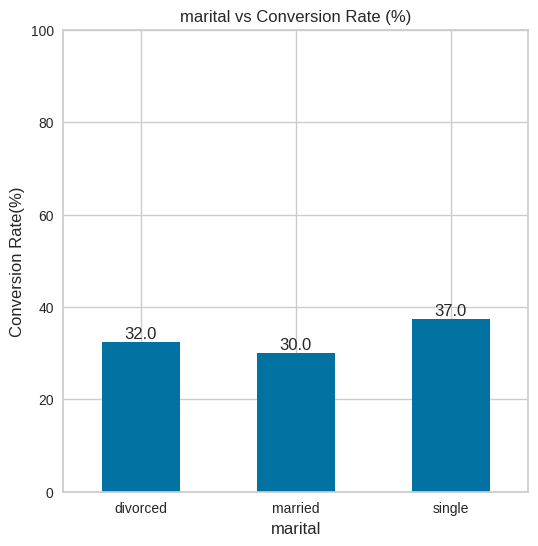

In [62]:
 #hubungan status dengan conversion rate 
cat_cat('marital','deposit')

In [63]:
uji_chisquare('marital','deposit')

===== marital =====
Number Expected :
[[ 473.21707411  421.78292589]
 [2342.82106745 2088.17893255]
 [1314.96185844 1172.03814156]]

Chi-square Statistic : 71.11451867463643 ,p-value: 3.6114239862287743e-16 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Berdasarkan barchart dan hasil uji statistik, dapat diketahui bahwa nasabah single (37.0%) memiliki keinginan lebih besar membuka deposit dibandingkan yang married (30%) dan divorced (32%)

### 1.8 Campaign Vs Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

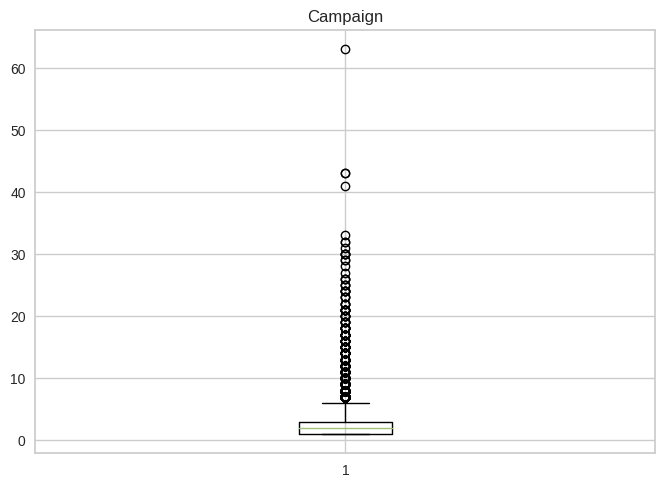

In [64]:
#Check boxplot umur

plt.boxplot(df['campaign'])
plt.title('Campaign')
plt.show

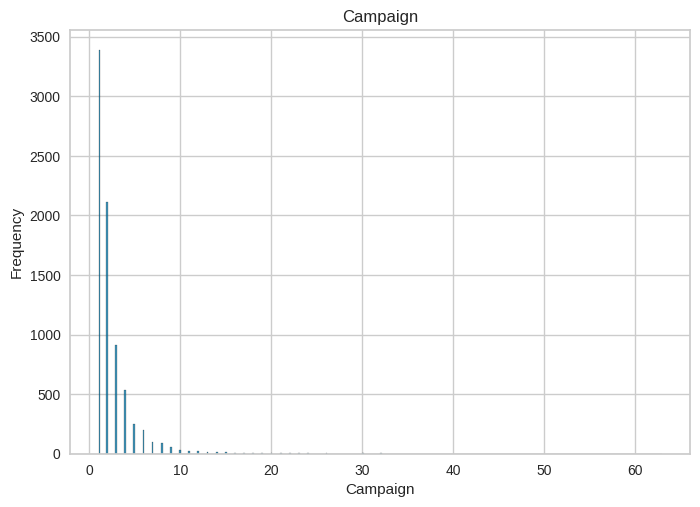

In [65]:
#Campaign
sns.histplot(x_train['campaign'], kde=False, edgecolor='black')

# Set labels and title
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.title('Campaign')

# Show the chart
plt.show()


In [66]:
#cek outlier
x_train['outlier_campaign'] = outlier(x_train,'campaign')
x_train[x_train['outlier_campaign']=='outlier'].head(20)

outiler lower limit : -2.0
 outlier upper limit :6.0


,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,age_cat,total_loan,outlier_campaign
361,41,blue-collar,single,secondary,no,75,1,0,1,jul,9,-1,0,1,41-50,1,outlier
812,46,technician,single,tertiary,no,4414,0,0,18,aug,7,-1,0,1,41-50,0,outlier
8388,55,technician,married,secondary,no,312,0,0,6,feb,8,9,3,0,51-60,0,outlier
4921,36,services,divorced,secondary,yes,0,0,1,15,jul,7,-1,0,1,31-40,1,outlier
1044,39,admin.,single,secondary,no,2263,1,1,21,nov,9,-1,0,1,31-40,2,outlier
618,46,other,married,secondary,no,271,1,0,30,jul,29,-1,0,1,41-50,1,outlier
4338,27,services,married,secondary,no,0,1,0,22,jul,13,-1,0,1,21-30,1,outlier
7116,36,admin.,single,secondary,no,1328,0,0,30,jul,9,-1,0,0,31-40,0,outlier
7888,37,technician,married,secondary,no,1580,0,0,22,aug,12,-1,0,0,31-40,0,outlier
8231,54,other,married,primary,no,3151,0,0,18,jun,7,-1,0,0,51-60,0,outlier


In [67]:
(x_train['outlier_campaign'].value_counts(normalize=True))*100

not outlier    94.637143
outlier         5.362857
Name: outlier_campaign, dtype: float64

**Observation**

Berdasarkan data oulier feature campaign, kita dapat mengetahui bahwa bank melakukan jumlah campaign yang berbeda kepada setiap nasabah. Ada yang melakukan campaign tidak sampai 6x, tetapi ada beberapa nasabah yang dihubungi lebih dari 6x, misal 30x. Karna tidak ada informasi mengenai periode campaign dan lama masa tenure nasabah, maka kita dapat mengasumsikan bahwa periode campaign terjadi dalam waktu yang cukup lama dan nasabah yang dihubungi lebih dari 6x merupakan nasabah dengan masa tenure lama sehingga data outlier feature campaign adalah data yang make sense. Selain itu data outlier mengandung informasi pada feature lain, jadi data outlier pada feature campaign akan dipertahankan



In [68]:
#drop feature outlier_campaign
x_train = x_train.drop('outlier_campaign',axis=1)


In [69]:
(x_train['campaign'].value_counts(normalize=True))*100


1     43.338026
2     27.006272
3     11.672853
4      6.885959
5      3.238193
6      2.495840
7      1.241521
8      1.139127
9      0.716754
10     0.396775
11     0.319980
12     0.319980
13     0.230385
15     0.140791
14     0.140791
17     0.115193
16     0.076795
18     0.076795
21     0.063996
19     0.063996
26     0.038398
24     0.038398
22     0.038398
20     0.038398
30     0.038398
23     0.025598
32     0.025598
41     0.012799
63     0.012799
29     0.012799
33     0.012799
25     0.012799
43     0.012799
Name: campaign, dtype: float64

In [70]:
uji_annova('campaign')

campaign
Kesimpulan : nilai p_value 7.863555840234008e-29 kurang dari alpha 0.05, nilai ftest = 125.13642629760876
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Berdasarkan hasil uji statistik, jumlah campaign mempengaruhi conversion rate. Selanjutnya, kita akan melakukan pengelompokan jumlah campaign karna jumlah unique value pada feature campaign terlalu banyak agar memudahkan analisa. Berikut adalah pengolompokan jumlah campaign :

1. 1-3x
2. 4-6x
3. lebih dari 7x

In [71]:
#mengelompokkan jumlah campaign

def bin_campaign (x) :
    if x<=3 :
        return '1-3'
    elif x<=6 :
        return '4-6'
    else :
        return '7+'

In [72]:
x_train['campaign_cat'] = x_train['campaign'].apply(bin_campaign)
x_train['campaign_cat'].unique()


array(['1-3', '7+', '4-6'], dtype=object)

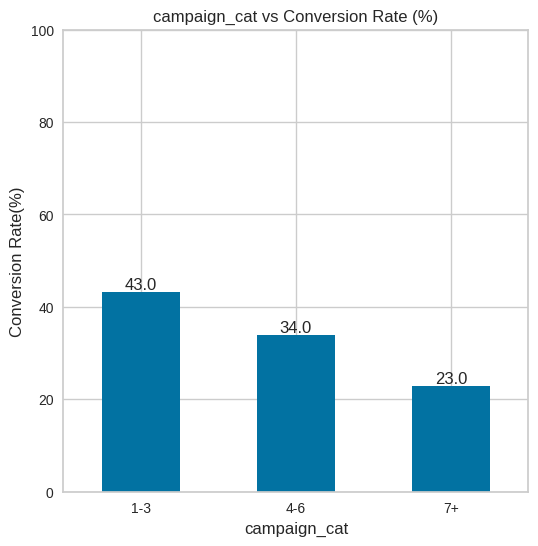

In [73]:
cat_cat('campaign_cat','deposit')


**Observation**

Berdasarkan barchar diatas, dapat diketahui semakin banyak kita melakukan campaign kepada nasabah, maka semakin menurun persentase conversion rate, hal ini dapat terjadi karna mungkin nasabah merasa terganggu apabila kita sering menghubungi mereka untuk promosi. Jumlah campaign yang paling optimal adalah 1-3x (cr=43.2%)



### 1.9 Last Contact vs Conversion rate

In [74]:
x_train['month'].unique()

array(['jul', 'apr', 'aug', 'jan', 'feb', 'may', 'oct', 'jun', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [75]:
quarter_dict = {
    'jan' : '1Q',
    'feb' : '1Q',
    'mar' : '1Q', 
    'apr' : '2Q', 
    'may' : '2Q',
    'jun' : '2Q',
    'jul' : '3Q', 
    'aug' : '3Q',
    'sep' : '3Q', 
    'oct' : '4Q', 
    'nov' : '4Q',
    'dec' : '4Q'}


In [76]:
x_train['quarter'] = x_train['month'].map(quarter_dict)
x_train['quarter'].unique()

array(['3Q', '2Q', '1Q', '4Q'], dtype=object)

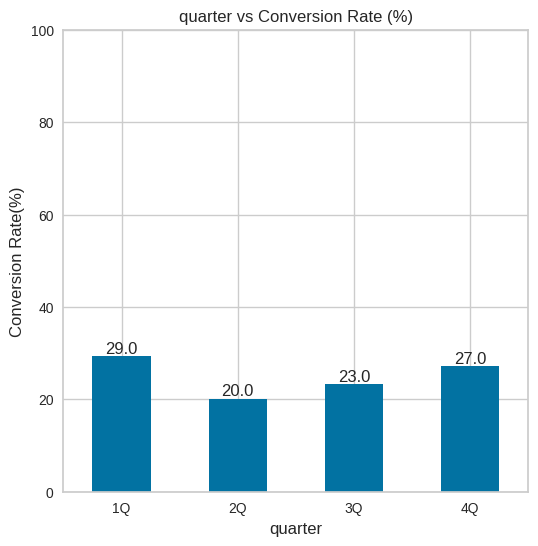

In [77]:
#hubungan last contact(quarter) dengan conversion rate
cat_cat('quarter','deposit')


In [78]:
uji_chisquare('quarter','deposit')

===== quarter =====
Number Expected :
[[ 508.11352873  452.88647127]
 [1822.01791885 1623.98208115]
 [1259.9735057  1123.0264943 ]
 [ 540.89504672  482.10495328]]

Chi-square Statistic : 141.92489092384753 ,p-value: 1.4534469560257042e-30 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Berdasarkan barchar diatas, dapat diketahui bahwa jika menghubungi nasabah pada awal tahun (1Q) dan akhir tahun (4Q), nasabah cenderung ingin membuka deposito dibandingkan ketika menghubungi di pertengahan tahun (3Q dan 2Q)

Last contact(Week) vs Conversion Rate

In [79]:
x_train['day'].unique()

array([ 9, 13,  1, 18, 28,  6,  4,  3, 15, 12, 29, 21, 27,  7, 22,  2,  5,
       23, 30, 11, 17, 26, 25, 20, 16, 19,  8, 10, 24, 14, 31])

In [80]:
uji_annova('day')

day
Kesimpulan : nilai p_value 4.9521482197415715e-06 kurang dari alpha 0.05, nilai ftest = 20.884911802197184
Terdapat perbedaan target yang signifikan dari segi predictor



Berdasarkan hasil uji statistik, tanggal last contact mempengaruhi conversion rate. Selanjutnya, kita akan melakukan pengelompokan tanggal menjadi perminggu karna jumlah unique value pada feature day terlalu banyak agar memudahkan analisa

In [81]:
#mengelompokkan tanggal

def bin_day (x) :
    if x<=7 :
        return '1W'
    elif x<=14 :
        return '2W'
    elif x<=21 :
        return '3W'
    else :
        return '4W'


In [82]:
x_train['week'] = x_train['day'].apply(bin_day)
x_train['week'].unique()

array(['2W', '1W', '3W', '4W'], dtype=object)

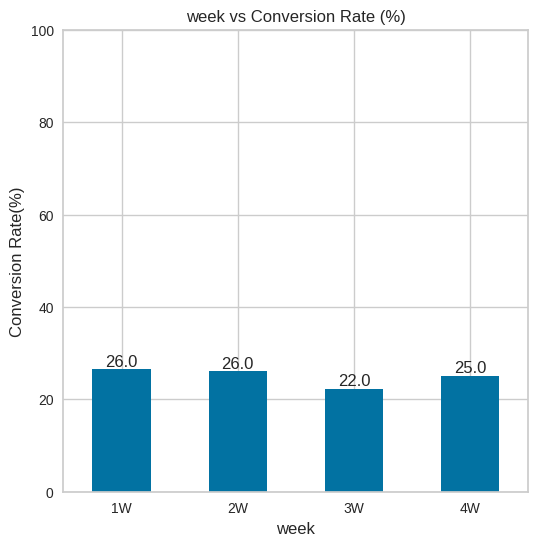

In [83]:
cat_cat('week','deposit')


In [84]:
uji_chisquare('week','deposit')

===== week =====
Number Expected :
[[ 932.15832587  830.84167413]
 [ 972.87085627  867.12914373]
 [1197.5828747  1067.4171253 ]
 [1028.38794317  916.61205683]]

Chi-square Statistic : 32.07707842940345 ,p-value: 5.041323674964882e-07 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Berdasarkan barchar diatas, dapat diketahui bahwa jika menghubungi nasabah pada 2 minggu pertama dalam satu bulan (1W dan 2W), nasabah cenderung ingin membuka deposito dibandingkan ketika menghubungi di 2 minggu terakhir (4W dan 3W)

Kontak Sebelum Campaign vs Conversion Rate

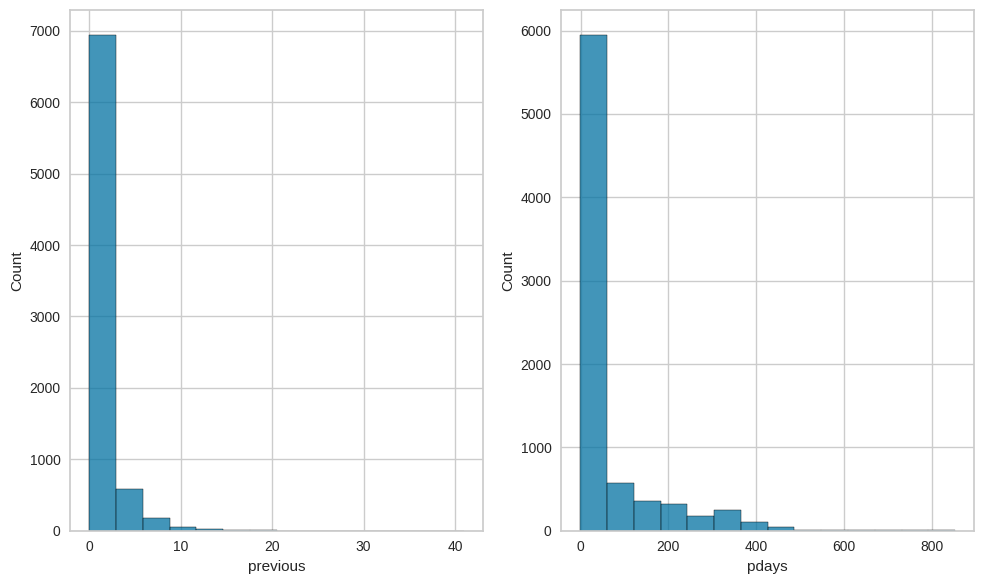

In [85]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(x_train['previous'])

plt.subplot(122)
sns.histplot(x_train['pdays'])
plt.tight_layout()

In [86]:
uji_annova('previous')


previous
Kesimpulan : nilai p_value 4.700433310523744e-40 kurang dari alpha 0.05, nilai ftest = 177.4786270899264
Terdapat perbedaan target yang signifikan dari segi predictor



In [87]:
uji_annova('pdays')

pdays
Kesimpulan : nilai p_value 1.271439480934147e-45 kurang dari alpha 0.05, nilai ftest = 203.60904227204293
Terdapat perbedaan target yang signifikan dari segi predictor



In [88]:
((x_train['previous'].value_counts(normalize=True))*100).sort_index(ascending=True).head(5)


0    75.092794
1     7.820300
2     5.977217
3     3.942148
4     2.137463
Name: previous, dtype: float64

In [89]:
((x_train['pdays'].value_counts(normalize=True))*100).sort_index(ascending=True).head(5)


-1    75.092794
 1     0.076795
 2     0.076795
 4     0.012799
 5     0.025598
Name: pdays, dtype: float64

**Observation**

Feature previous adalah jumlah kontak antara nasabah dan bank sebelum current campaign terjadi. Sedangkan, feature pdays adalah jumlah hari terakhir kontak antara nasabah dan bank sebelum current campaign terjadi. Maksud dari 0 pada feature previous dan -1 pada feature pdays adalah tidak pernah ada kontak antara nasabah dan bank. Karna 75% nasabah tidak pernah kontak dengan bank, maka untuk analisa selanjutnya kita akan menggunakan feature baru yaitu is_contact untuk merepresentativkan feature pdays dan previous. Kita akan membuat feature is_contact dengan menggunakan informasi pada feature pdays karna nilai p-value lebih kecil daripada nilai p-value previous



In [90]:
x_train['is_contact'] = x_train['pdays'].apply(lambda x : 0 if x<=0 else 1)

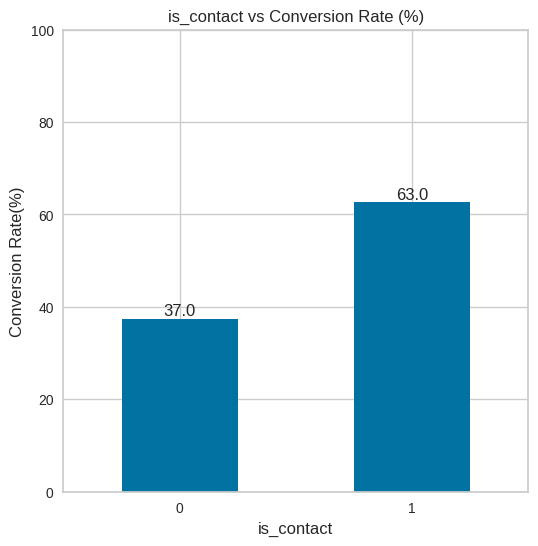

In [91]:
#hubungan last contact dengan conversion rate
cat_cat('is_contact','deposit')

In [92]:
uji_chisquare('is_contact','deposit')

===== is_contact =====
Number Expected :
[[3102.08332267 2764.91667733]
 [1028.91667733  917.08332267]]

Chi-square Statistic : 431.5781049889739 ,p-value: 7.3691106160784495e-96 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



**Observation**

Berdasarkan barchar diatas, dapat diketahui bahwa nasabah yang dihubungi sebelum campaign berjalan cenderung ingin membuka deposit daripada yang tidak dihubungi oleh bank

## Deep-dive Question Analysis
1. Bagaimana status pernikahan nasabah setiap kategori umur?
2. Apa penyebab nasabah yang belum menikah memiliki kecenderungan subscribe deposit?
3. Apa penyebab nasabah kelompok umur 61+ memiliki conversion rate paling tinggi meskipun sudah banyak yang menikah?
4. Apa penyebab nasabah yang sudah pensiun dan bekerja dibidang management memiliki conversion rate yang tinggi?
5. Apa mayoritas pekerjaan nasabah kelompok 61+ dan kelompok 21-30?
6. Apakah pendidikan adalah alasan nasabah perkelompok umur untuk subscribe deposit?


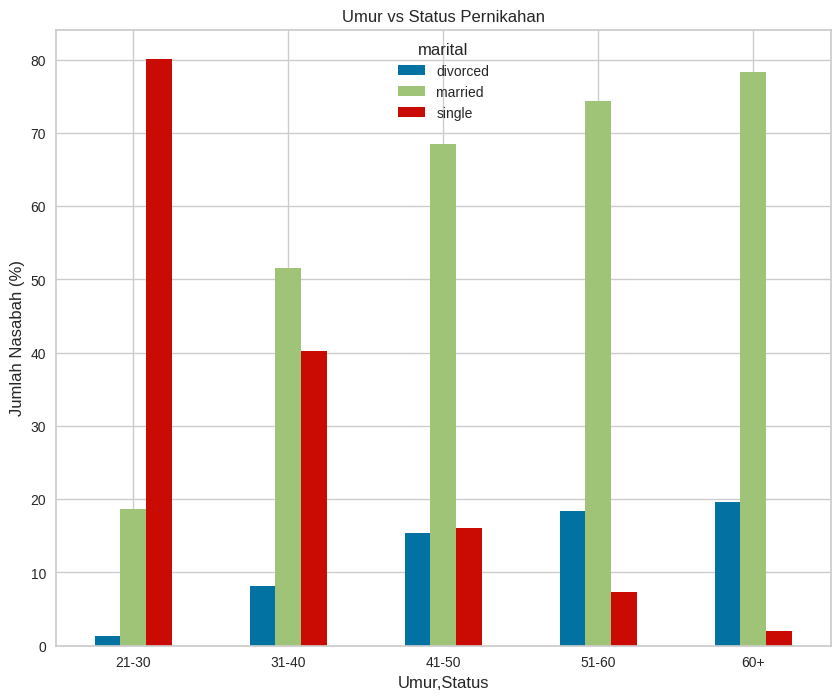

In [93]:
((pd.crosstab(x_train['age_cat'],x_train['marital']).apply(lambda x:x/x.sum(),axis=1))*100).plot(kind='bar',figsize=(10,8))
plt.title('Umur vs Status Pernikahan',fontsize=12) 
plt.xlabel('Umur,Status',fontsize=12)
plt.ylabel('Jumlah Nasabah (%)',fontsize=12)
plt.xticks(rotation=0);


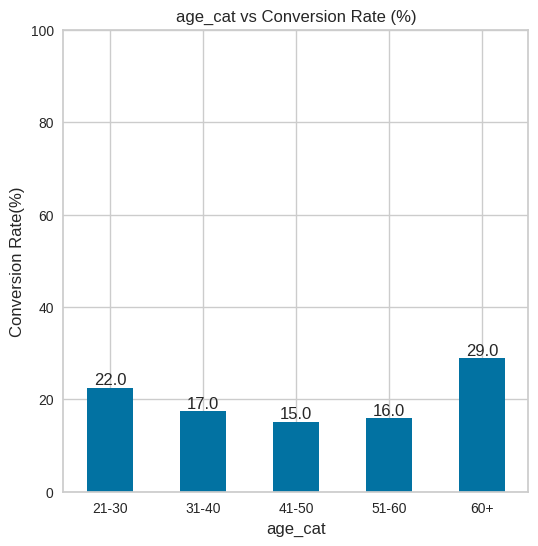

In [94]:
cat_cat('age_cat','deposit')


Observation
Menurut analisa Status Pernikahan vs Conversion Rate,nasabah yang belum menikah memiliki kecenderungan subscribe deposit lebih tinggi dibandingkan nasabah yang sudah menikah. Lalu berdasarkan 2 barchart diatas, kita tahu bahwa :

1. Semakin bertambahnya umur, semakin banyak nasabah yang sudah menikah.
2. Kelompok umur 61+ dan 21-30 adalah kelompok nasabah yang memiliki kecenderungan subscribe deposit paling tinggi dibandingkan kelompok lainnya
3. Kelompok umur 61+ adalah nasabah-nasabah yang sudah menikah
4. Kelompok umur 21-30 adalah nasabah-nasabah yang belum menikah

Dari 4 poin diatas, muncul pertanyaan 

(1) Apa penyebab nasabah yang belum menikah memiliki conversion rate tinggi? 

(2) Apa penyebab nasabah umur 61+ memiliki conversion rate tinggi meski banyak yang sudah menikah?. 

Apa penyebab nasabah yang belum menikah memiliki kecenderungan subscribe deposit?

In [95]:
from functools import reduce
def predictor_marital (i,j='marital') : 
    a0 = pd.crosstab(x_train[i],x_train[j]).unstack(level=1).reset_index()
    a1 = a0
    
    #filter tabel berdasarkan 0 dan 1
    a0 = a0[a0[i]==0]
    a1 = a1[a1[i]==1]
    
    #ganti kolom 0 sesuai 0 dan 1 tiap table
    a0 = a0.rename(columns={0:'count0'})
    a1 = a1.rename(columns={0:'count1'})
    
    #drop kolom feature tiap table
    a0 = a0.drop(i,axis=1)
    a1 = a1.drop(i,axis=1)
    
    #gabungkan tabel
    total = [a0,a1]
    final = reduce(lambda left,right: pd.merge(left,right,on=['marital'],
                                                how='outer'), total)
    
    #hitung persentase nasabah 0 dari jumlah total 0 dan 1 tiap kategori umur
    final['sum'] = (final['count0']+final['count1'])
    final['percent_count0'] = round(((final['count0']/final['sum'])*100),2)
    
    #hitung persentase nasabah 0 dari jumlah total persentase nasabah 0 
    final['percent_final'] = round(((final['percent_count0']/final['percent_count0'].sum())*100),1)
    
    #membuat barplot
    plt.figure(figsize=(10,8))
    ax = sns.barplot(data=final, x='marital', y='percent_count0',errwidth=0)
    plt.xlabel('Status Pernikahan')
    plt.ylim (0,110)
    
    for x in ax.containers :
        ax.bar_label(x,)
    
    if i=='loan' : 
        plt.title(f'Jumlah Nasabah Tidak Memiliki Pinjaman Pribadi (%) vs Status Pernikahan')
        plt.ylabel('Jumlah Nasabah Tidak Memiliki Pinjaman Pribadi (%)')
    
    if i=='housing' : 
        plt.title(f'Jumlah Nasabah Tidak Memiliki Cicilan Rumah (%) vs Status Pernikahan')
        plt.ylabel('Jumlah Nasabah Tidak Memiliki Cicilan Rumah (%)')
   
    elif i=='default' : 
        plt.title(f'Jumlah Nasabah Tidak Gagal Bayar (%) vs Status Pernikahan')
        plt.ylabel('Jumlah Nasabah Tidak Gagal Bayar (%)')


In [96]:
x_train['default'] = x_train['default'].replace(['yes','no'],[1,0])

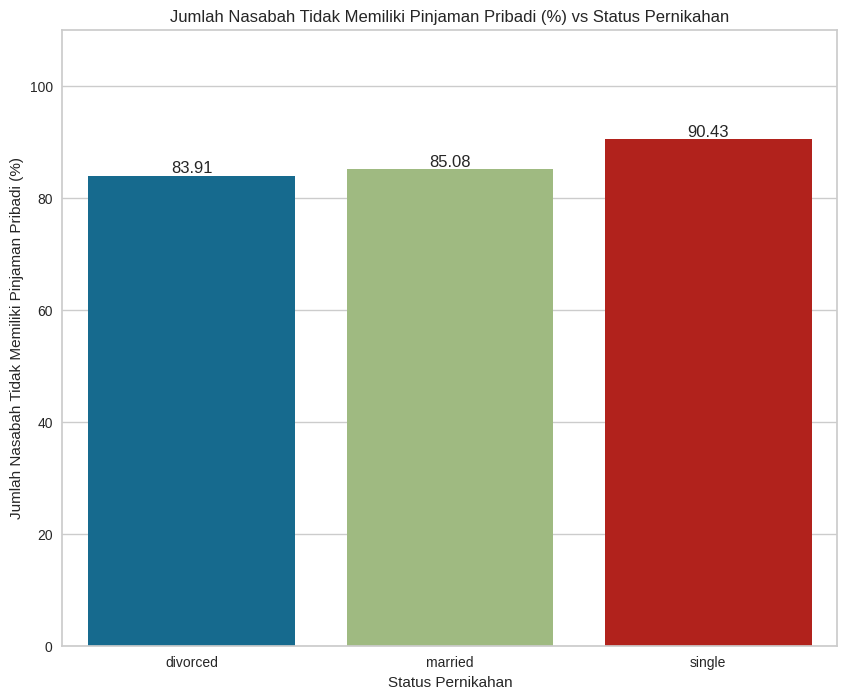

In [97]:
predictor_marital('loan')


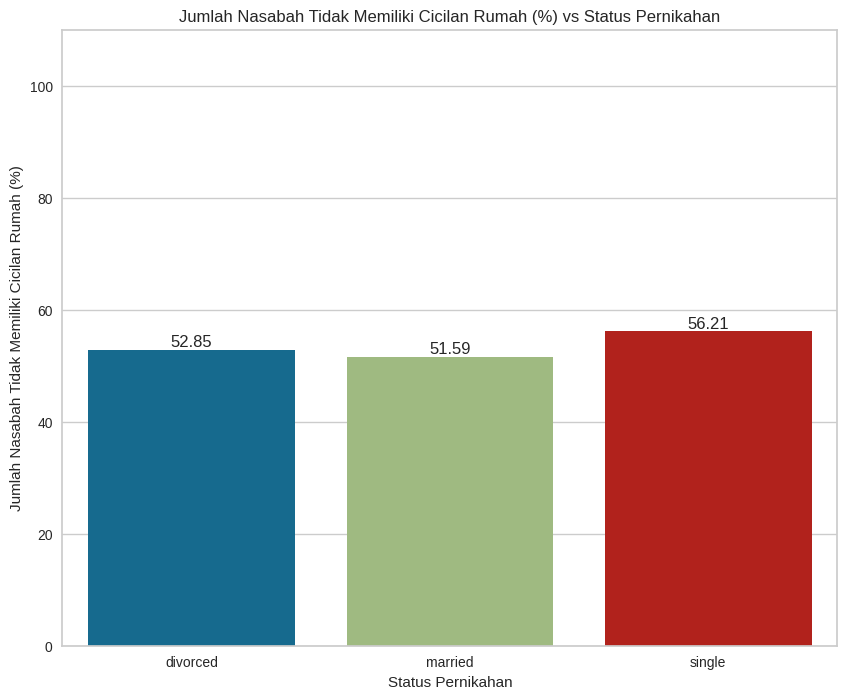

In [98]:
predictor_marital('housing')


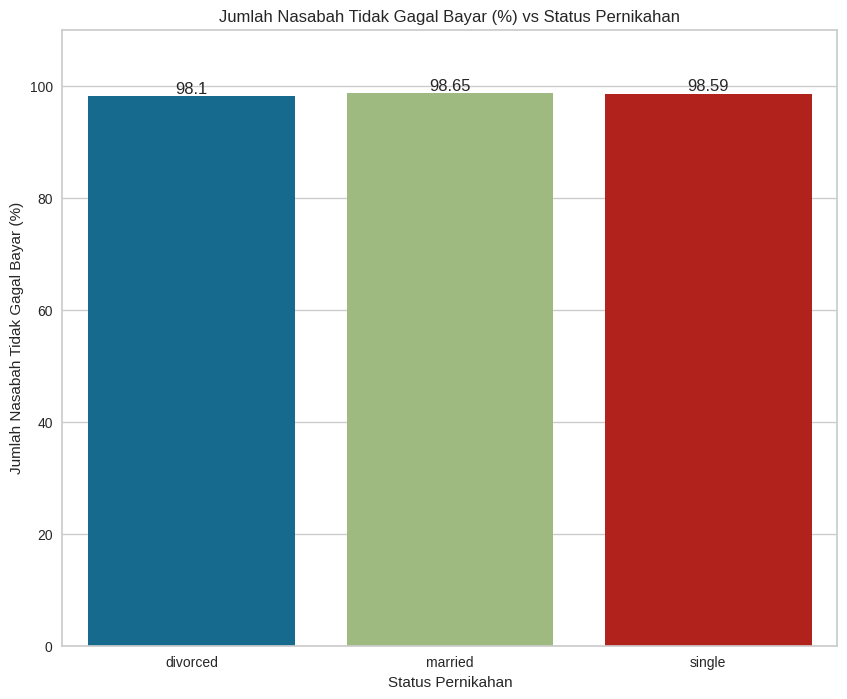

In [99]:
predictor_marital('default')

**Observation**
Berdasarkan analisa Loan vs Conversion Rate dan Gagal Bayar vs Conversion Rate, kita tahu bahwa nasabah yang tidak gagal bayar dan tidak memiliki pinjaman baik cicilan rumah atau pinjaman pribadi cenderung ingin membuka deposit.Lalu dari 3 barchart diatas, dapat diketahui :

1. Hampir semua nasabah adalah nasabah yang tidak pernah gagal bayar
2. Nasabah single adalah nasabah yang paling sedikit memiliki cicilan rumah dan pinjaman pribadi. Hal ini masuk akal mengapa nasabah single memiliki kecenderungan subscribe deposit paling tinggi


Apa penyebab nasabah kelompok umur 61+ memiliki conversion rate paling tinggi meskipun sudah banyak yang menikah?

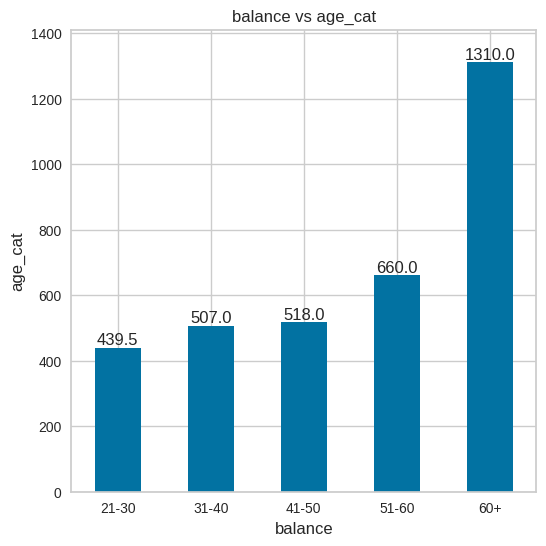

In [100]:
num_cat('balance','age_cat')

**Observation**

Berdasarkan barchart diatas, kita tahu bahwa nasabah kelompok umur 60+ memiliki jumlah balance yang berbeda signifikan dibandingkan kelompok lainnya. Lalu, menurut analisa Balance vs Conversion Rate, nasabah yang cenderung subscribe deposit memiliki jumlah balance lebih banyak daripada yang tidak subscribe. Hal ini menjadi masuk akal mengapa nasabah kelompok umur 60+ memiliki conversion rate paling tinggi dibandingkan kelompok lainnya meskipun sudah menikah



Apa penyebab nasabah yang sudah pensiun dan bekerja dibidang management memiliki conversion rate yang tinggi?


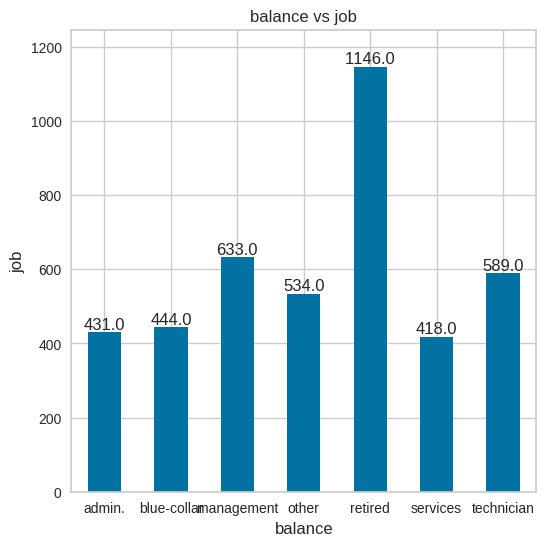

In [101]:
num_cat('balance','job')

**Observation**

Berdasarkan barchart diatas, dapat diketahui bahwa nasabah yang bekerja dibidang management dan seorang pensiunan memiliki jumlah balance lebih tinggi dibandingnkan nasabah dengan pekerjaan lainnya karna memiliki jumlah balance lebih tinggi, hal ini selaras dengan informasi Balance vs Conversion Rate, dimana nasabah dengan jumlah balance yang lebih tinggi cenderung membuka deposit.




## Apa mayoritas pekerjaan nasabah kelompok 61+ dan kelompok 21-30?


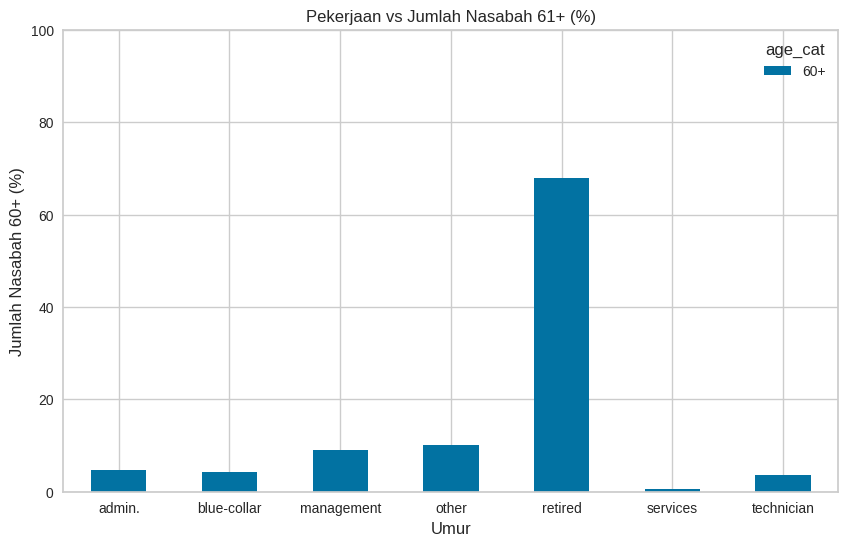

In [102]:
((pd.crosstab(x_train['job'],x_train[x_train['age_cat']=='60+']['age_cat']).apply(lambda x : x/x.sum(),axis=0))*100).plot(kind='bar',figsize=(10,6))
plt.title('Pekerjaan vs Jumlah Nasabah 61+ (%)',fontsize=12) 
plt.xlabel('Umur',fontsize=12)
plt.ylabel('Jumlah Nasabah 60+ (%)',fontsize=12)
plt.ylim(0,100)
plt.xticks(rotation=0);


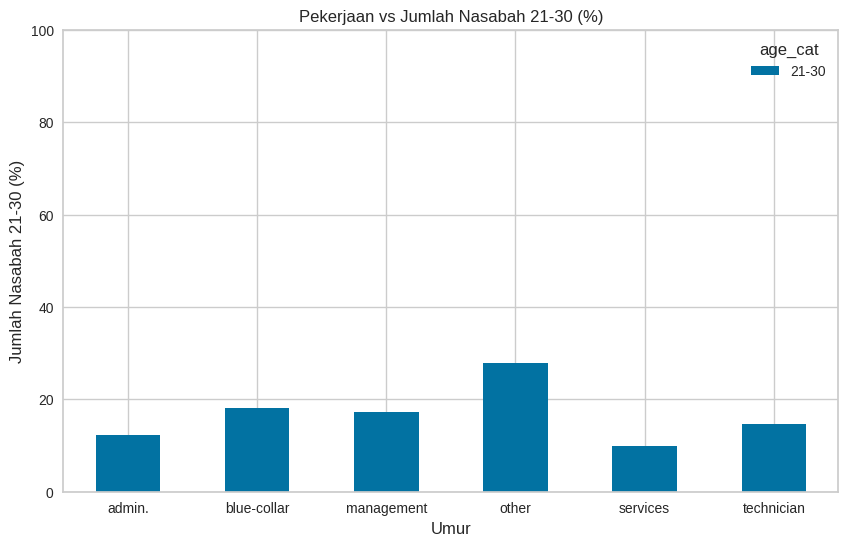

In [103]:
((pd.crosstab(x_train['job'],x_train[x_train['age_cat']=='21-30']['age_cat']).apply(lambda x : x/x.sum(),axis=0))*100).plot(kind='bar',figsize=(10,6))
plt.title('Pekerjaan vs Jumlah Nasabah 21-30 (%)',fontsize=12) 
plt.xlabel('Umur',fontsize=12)
plt.ylabel('Jumlah Nasabah 21-30 (%)',fontsize=12)
plt.ylim(0,100)
plt.xticks(rotation=0);


**Observation**

Pekerjaan nasabah kelompok umur 60+ : pensiunan
Pekerjaan nasabah kelompok umur 21-30 : management


9.6 Apakah pendidikan adalah alasan nasabah perkelompok umur untuk subscribe deposit?

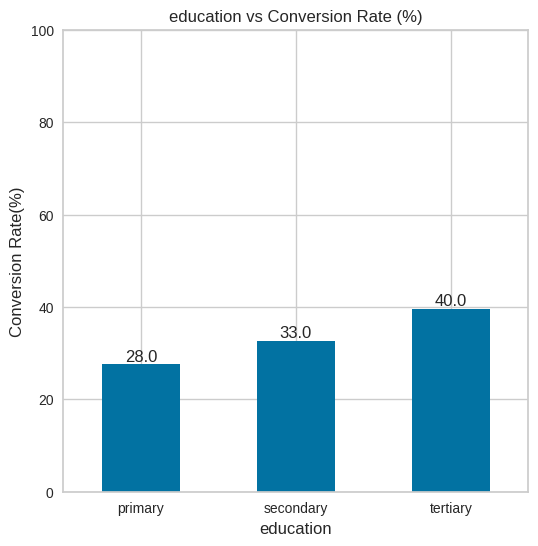

In [104]:
cat_cat('education','deposit')


In [105]:
uji_chisquare('job','deposit')

===== job =====
Number Expected :
[[486.96416229 434.03583771]
 [712.20491489 634.79508511]
 [961.76743888 857.23256112]
 [672.02111865 598.97888135]
 [288.68885191 257.31114809]
 [342.61973634 305.38026366]
 [666.73377704 594.26622296]]

Chi-square Statistic : 164.11517723037275 ,p-value: 7.95488044014975e-33 kurang dari 0.05 
Terdapat perbedaan target yang signifikan dari segi predictor



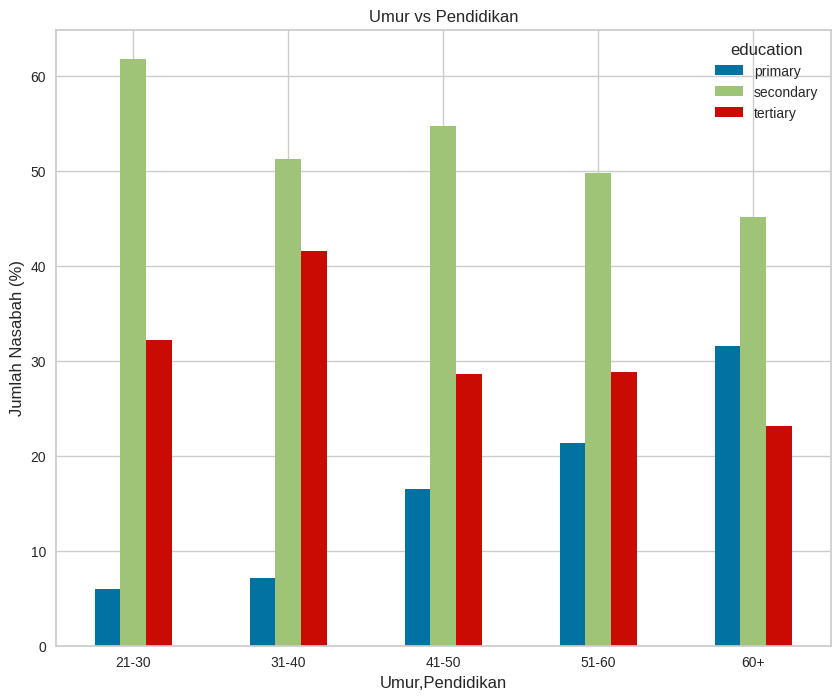

In [106]:
((pd.crosstab(x_train['age_cat'],x_train['education']).apply(lambda x:x/x.sum(),axis=1))*100).plot(kind='bar',figsize=(10,8))
plt.title('Umur vs Pendidikan',fontsize=12) 
plt.xlabel('Umur,Pendidikan',fontsize=12)
plt.ylabel('Jumlah Nasabah (%)',fontsize=12)
plt.xticks(rotation=0);

**Observation**

Berdasarkan 2 barchart diatas dapat disimpulkan bahwa pendidikan bukan alasan nasabah perkelompok umur untuk subscribe deposit karna sebagian besar pendidikan nasabah perkelompok umur adalah secondary bukan tertiary



## Data Preprosesing


In [107]:
data_info(x_train)

Jumlah Row dan Columns : (7813, 20)
Duplicated Values : 0


,Missing_Value,Missing_Value_(%),Data_Type,Number_Of_Unique
age,0,0.0,int64,75
job,0,0.0,object,7
week,0,0.0,object,4
quarter,0,0.0,object,4
campaign_cat,0,0.0,object,3
total_loan,0,0.0,int64,3
age_cat,0,0.0,object,5
deposit,0,0.0,int64,2
previous,0,0.0,int64,28
pdays,0,0.0,int64,431


## Data Preprocessing - Train

In [108]:
#rank encoding
x_train['month'] = x_train['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
x_train['week'] = x_train['week'].replace(['1W','2W','3W','4W'],[1,2,3,4])
x_train['quarter'] = x_train['quarter'].replace(['1Q','2Q','3Q','4Q'],[1,2,3,4])
x_train['campaign_cat'] = x_train['campaign_cat'].replace(['1-3','4-6','7+'],[0,1,2])
x_train['age_cat'] = x_train['age_cat'].replace(['21-30','31-40','41-50','51-60','60+'],[0,1,2,3,4])

#one hot encoding
x_train= pd.get_dummies(x_train,columns=['job','education','marital'])

In [ ]:
n 

Text(0.5, 1.0, 'Correlation Matrix')

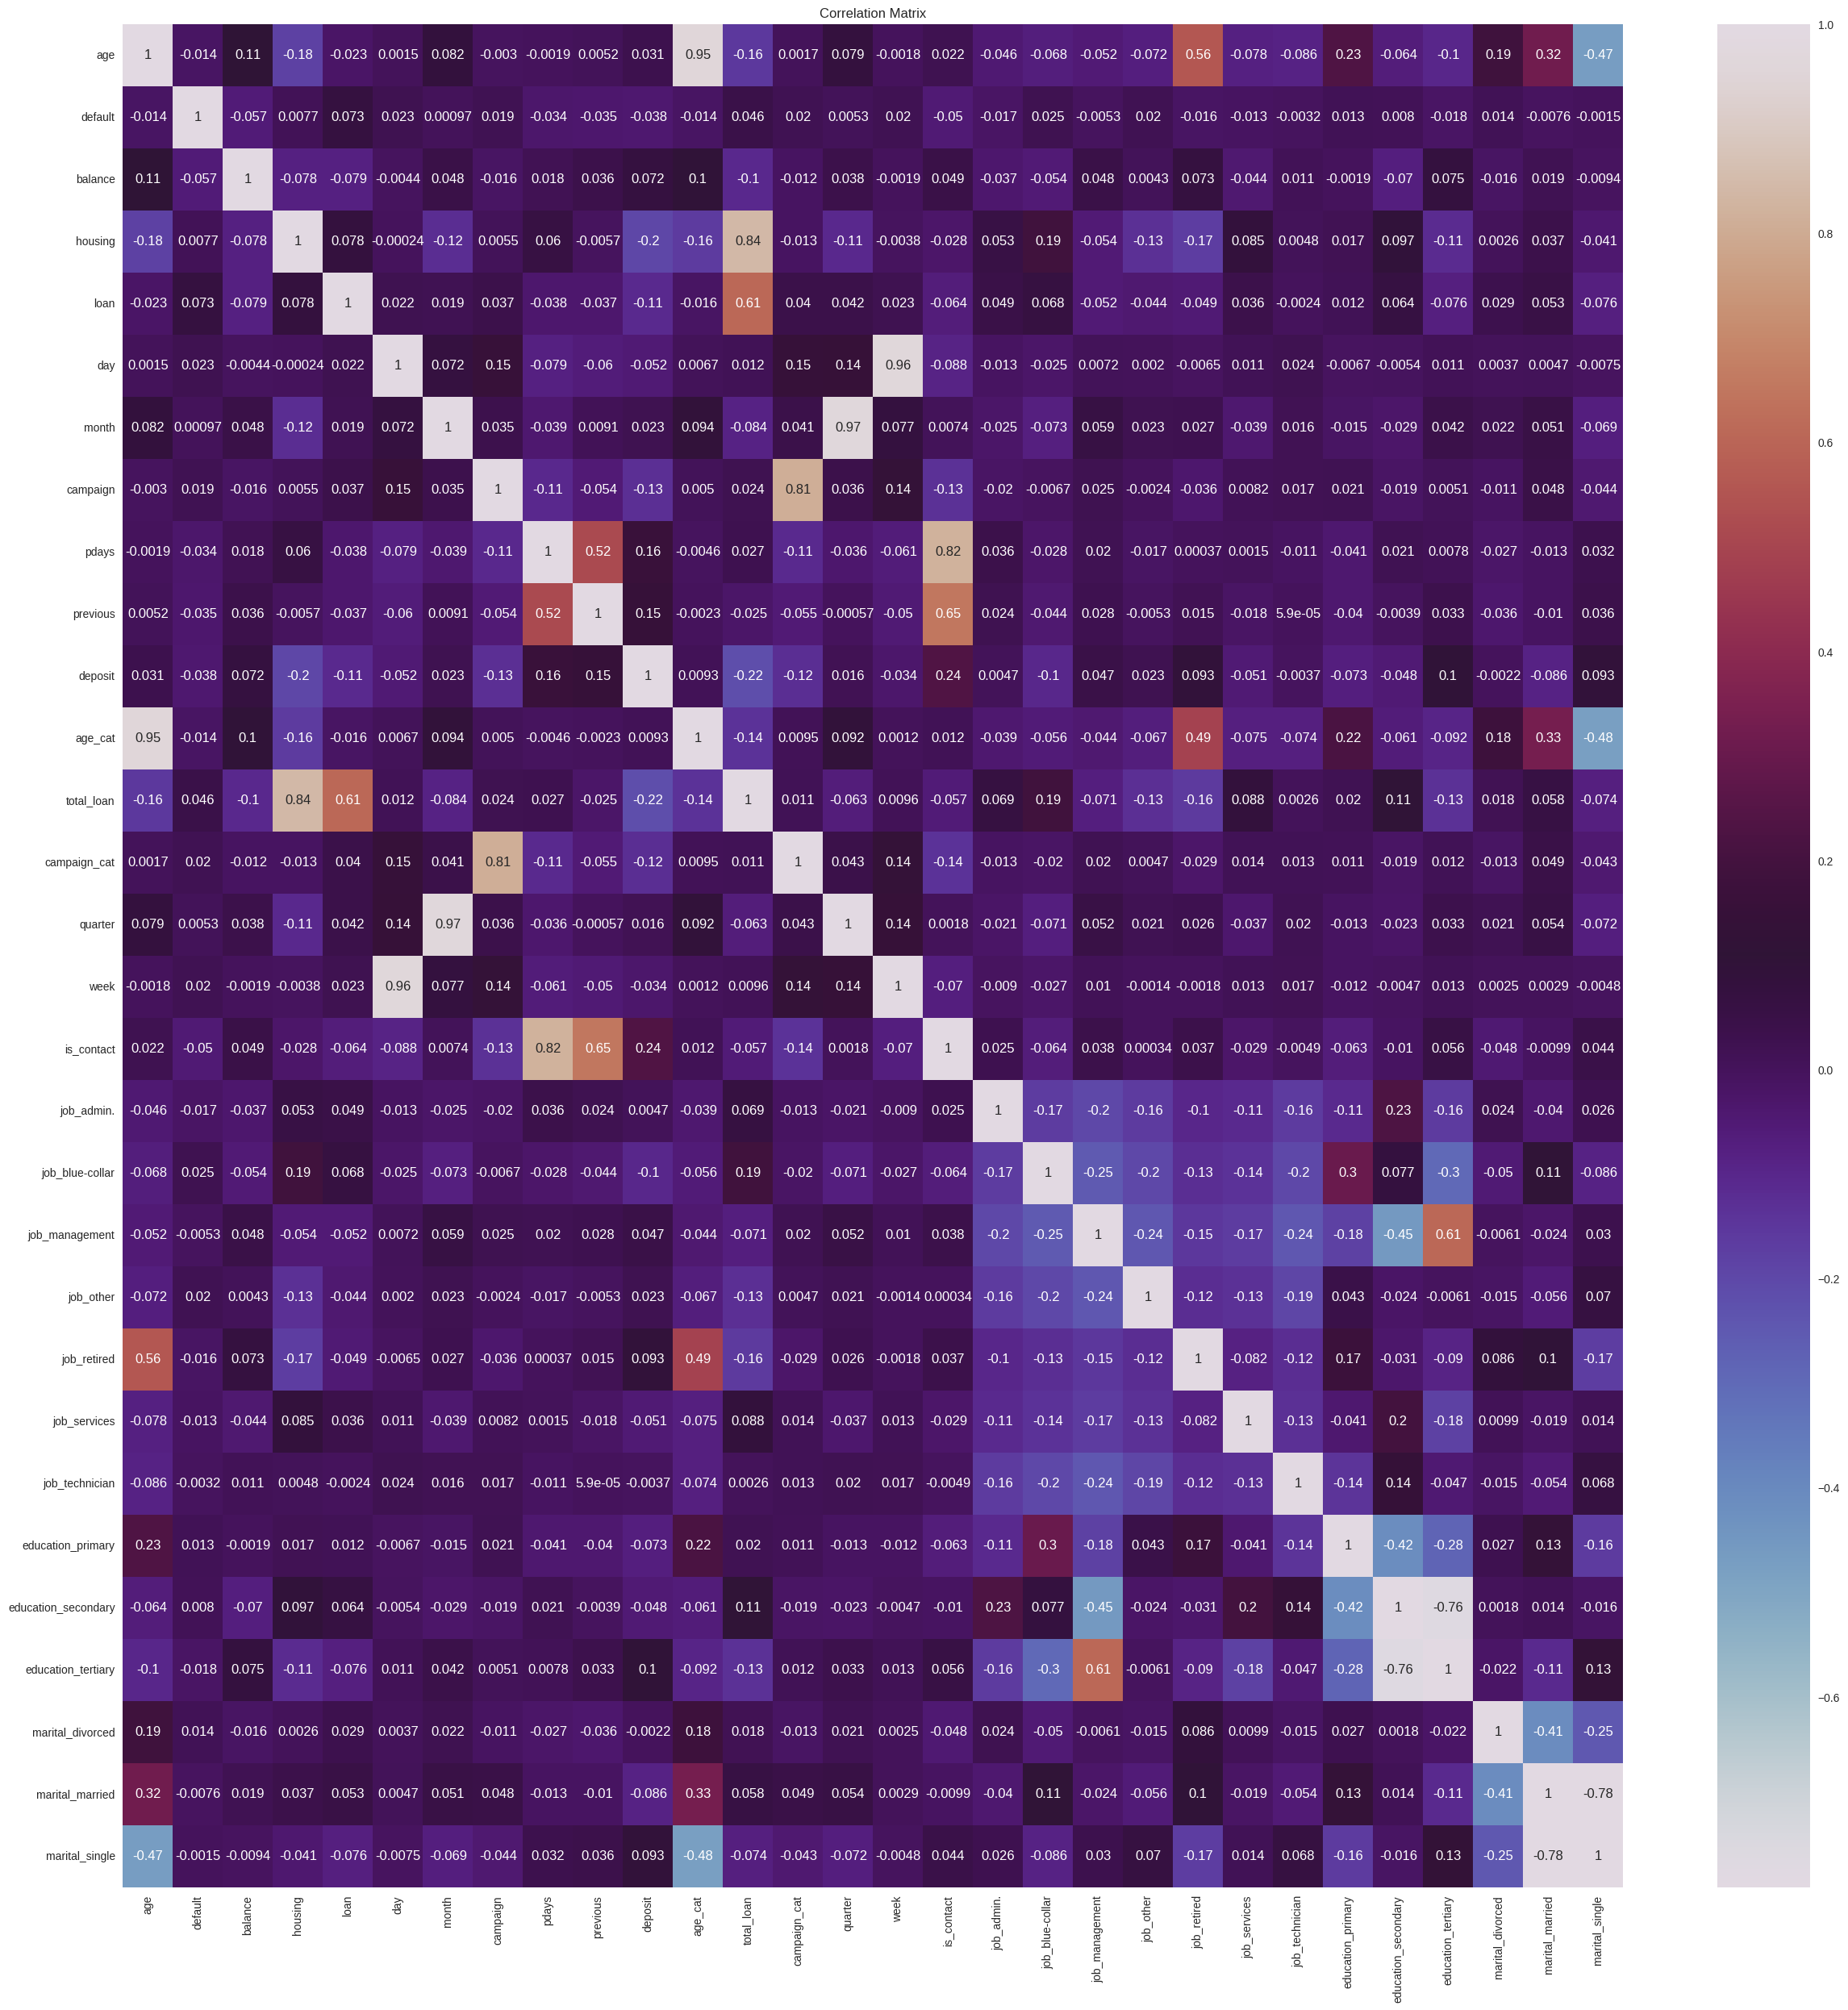

In [109]:
plt.figure(figsize=(30,30))
sns.heatmap(x_train.corr(), annot = True,
           fmt='.2g', cmap='twilight')
plt.title('Correlation Matrix',fontsize = 12)


Observation

Berdasarkan korrelasi analisis diatas, saya memutuskan untuk menghapus feature yang memiliki korelasi lebih dari 0,7


In [110]:
x_train = x_train.drop(['age_cat','week','housing','quarter','campaign_cat','pdays','education_secondary','marital_married','deposit'],axis=1)


# Data Preprocessing - Test

In [111]:
data_info(x_test)

Jumlah Row dan Columns : (3349, 14)
Duplicated Values : 1


,Missing_Value,Missing_Value_(%),Data_Type,Number_Of_Unique
age,0,0.0,int64,74
job,0,0.0,object,12
marital,0,0.0,object,3
education,0,0.0,object,4
default,0,0.0,object,2
balance,0,0.0,int64,1909
housing,0,0.0,object,2
loan,0,0.0,object,2
day,0,0.0,int64,31
month,0,0.0,object,12


In [112]:
#drop duplicate value
x_test.drop_duplicates(keep = 'first', inplace = True)

y_test = x_test['deposit']

In [113]:
#feature engineering
x_test['housing'] = x_test['housing'].replace(['yes','no'],[1,0])
x_test['loan'] = x_test['loan'].replace(['yes','no'],[1,0])
x_test['total_loan'] = x_test['housing'] + x_test['loan']
x_test['is_contact'] = x_test['pdays'].apply(lambda x : 0 if x<=0 else 1)
x_test['job'] =x_test['job'].replace(['entrepreneur','self-employed','student','unemployed','housemaid','unknown'],
                                       ['other','other','other','other','other','other'])
x_test['education'] =x_test['education'].replace('unknown','secondary')

#rank encoding
x_test['default'] = x_test['default'].replace(['yes','no'],[1,0])
x_test['month'] = x_test['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12])

#one hot encoding
x_test= pd.get_dummies(x_test,columns=['job','education','marital'])

#feature selection
x_test = x_test.drop(['housing','pdays','education_secondary','marital_married','deposit'],axis=1)


##Model,Evaluation, Feature Importance

Model dan Evaluation 

In [114]:
def eval_train (X,y,model) :
    model.fit(X,y)
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,model.predict_proba(X)[:,1])}')
    
    disp.plot()


In [115]:
def eval_test (X,y,model) :
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,model.predict_proba(X)[:,1])}')
    
    disp.plot()


Logistic Regression

 Recall Score : 0.6330798479087453
 Precision Score : 0.6271186440677966
 F1 Score : 0.630085146641438
 ROC-AUC Score : 0.6940114167058177


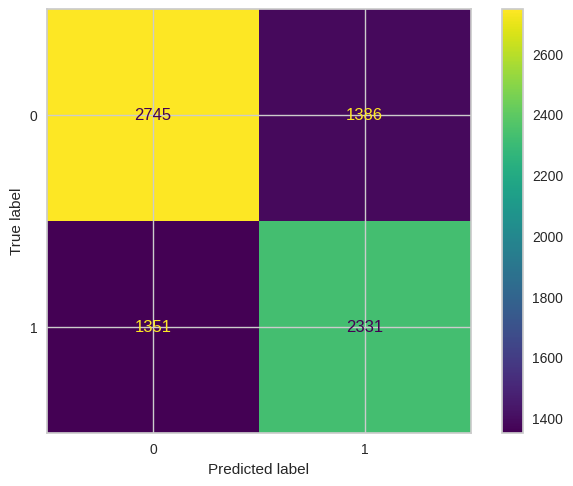

In [116]:
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')
eval_train(x_train, y_train, logreg_model)


 Recall Score : 0.6235220908525202
 Precision Score : 0.6506493506493507
 F1 Score : 0.6367969494756911
 ROC-AUC Score : 0.7008678644943307


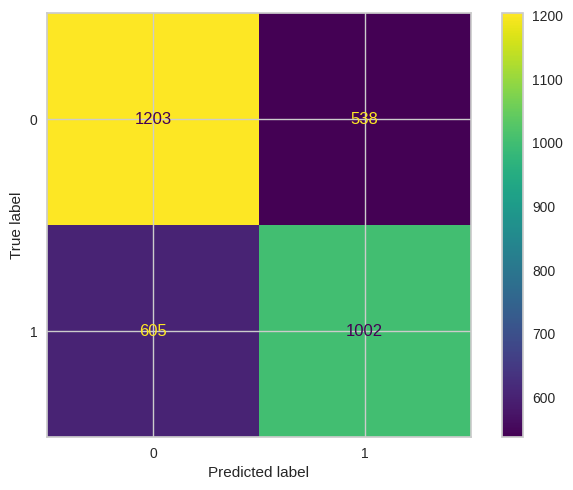

In [118]:
eval_test(x_test,y_test,logreg_model)

13.2 KNN

In [119]:
knn_model = KNeighborsClassifier()

 Recall Score : 0.652362846279196
 Precision Score : 0.7312024353120243
 F1 Score : 0.6895363858188602
 ROC-AUC Score : 0.7937585492817978


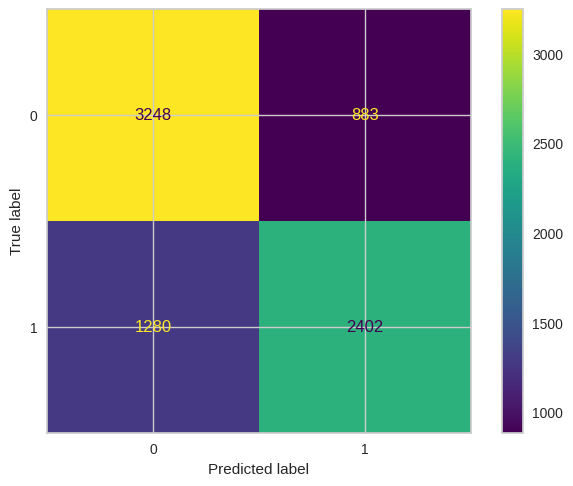

In [120]:
eval_train(x_train,y_train,knn_model)

 Recall Score : 0.5084007467330429
 Precision Score : 0.581081081081081
 F1 Score : 0.5423166279455691
 ROC-AUC Score : 0.6107457429747153


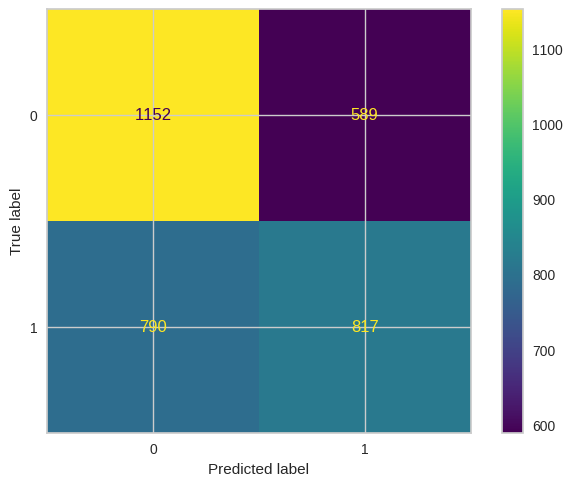

In [121]:
eval_test(x_test,y_test,knn_model)


Naive Bayes

In [122]:
naive = GaussianNB()

 Recall Score : 0.6827810972297664
 Precision Score : 0.6005733397037745
 F1 Score : 0.6390442297915607
 ROC-AUC Score : 0.685820082151999


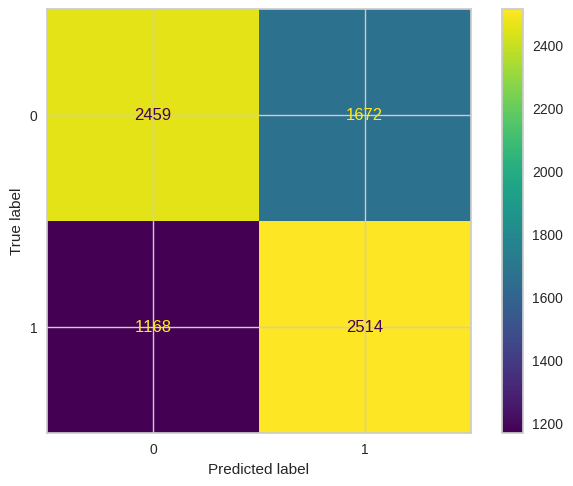

In [123]:
eval_train(x_train,y_train,naive)

 Recall Score : 0.6677037958929682
 Precision Score : 0.6075877689694225
 F1 Score : 0.6362288763711829
 ROC-AUC Score : 0.6862003790853272


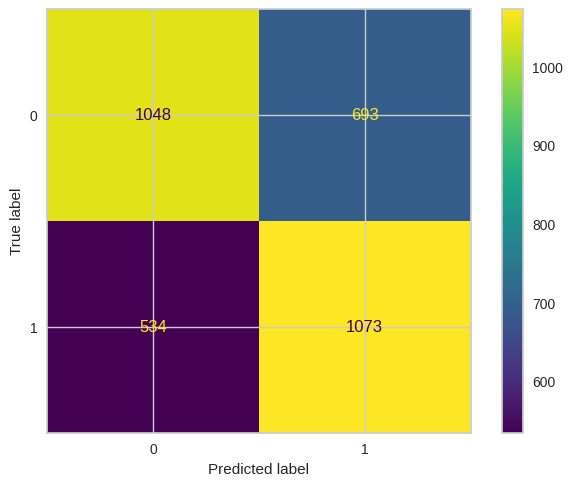

In [124]:
eval_test(x_test,y_test,naive)

Decission Tree

In [125]:
dt = DecisionTreeClassifier(random_state=42)

 Recall Score : 1.0
 Precision Score : 1.0
 F1 Score : 1.0
 ROC-AUC Score : 1.0


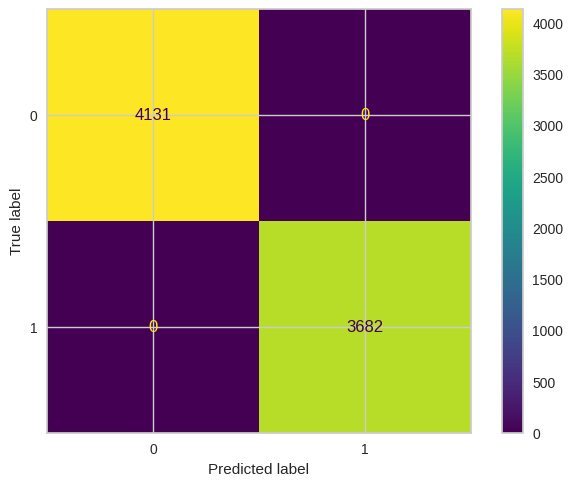

In [126]:
eval_train(x_train,y_train,dt)

In [127]:
parameters = {
'criterion' : ('gini','entropy'),
'max_depth' : (5, 8,10, 15 ,20, 25, 30),
'min_samples_split' : (2, 5, 10, 15, 100),
'min_samples_leaf' : (1, 2, 5, 10,20,30)
}

gridD = RandomizedSearchCV(dt, parameters, cv =5, verbose = 1, 
                          n_iter=10)
bestD = gridD.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


 Recall Score : 0.5725149375339489
 Precision Score : 0.7960725075528701
 F1 Score : 0.6660347551342811
 ROC-AUC Score : 0.7761058561339385


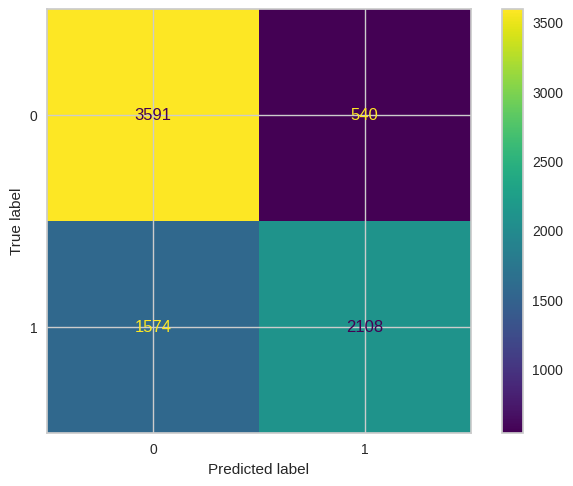

In [128]:
#menggunakan fungsi eval_test karna sudah difit dalam variable bestD
eval_test(x_train,y_train,bestD)


 Recall Score : 0.5339141257000622
 Precision Score : 0.7660714285714286
 F1 Score : 0.6292629262926293
 ROC-AUC Score : 0.7445509611703821


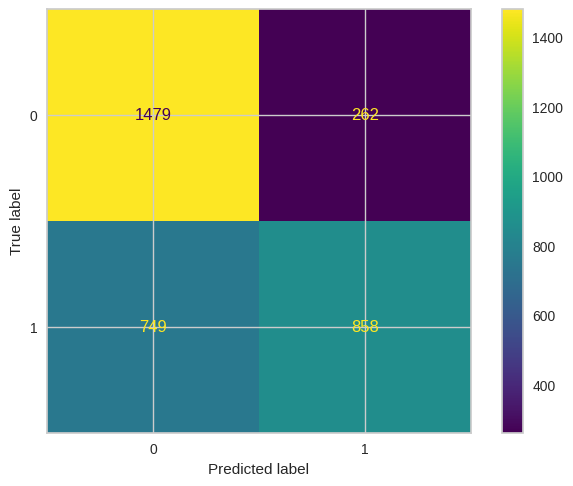

In [129]:
eval_test(x_test,y_test,bestD)


Random Forest

In [130]:
rf = RandomForestClassifier(random_state=42)

 Recall Score : 1.0
 Precision Score : 1.0
 F1 Score : 1.0
 ROC-AUC Score : 1.0


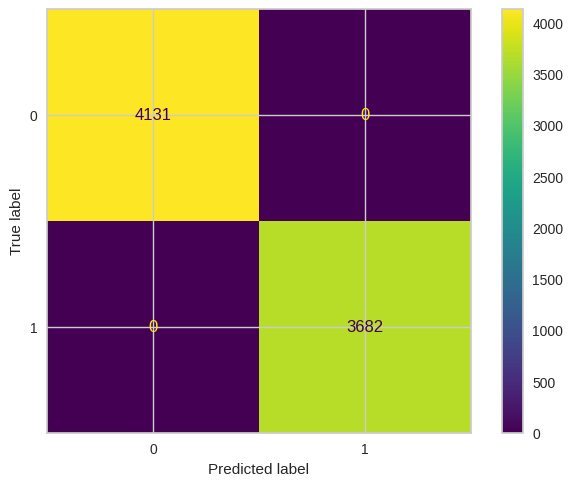

In [132]:
eval_train(x_train,y_train,rf)

In [135]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier using the evaluation function
rf.fit(x_train, y_train)

# Define the parameter grid for hyperparameter tuning
parameters = {
    'n_estimators': [100, 300, 500, 600, 800],
    'max_depth': [5, 8, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10, 20, 30]
}

# Perform randomized search cross-validation
gridF = RandomizedSearchCV(rf, parameters, cv=5, verbose=1, n_iter=10)
gridF.fit(x_train, y_train)

# Get the best model
bestF = gridF.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


 Recall Score : 0.6325366648560565
 Precision Score : 0.8490703609187021
 F1 Score : 0.7249805447470817
 ROC-AUC Score : 0.868228077974841


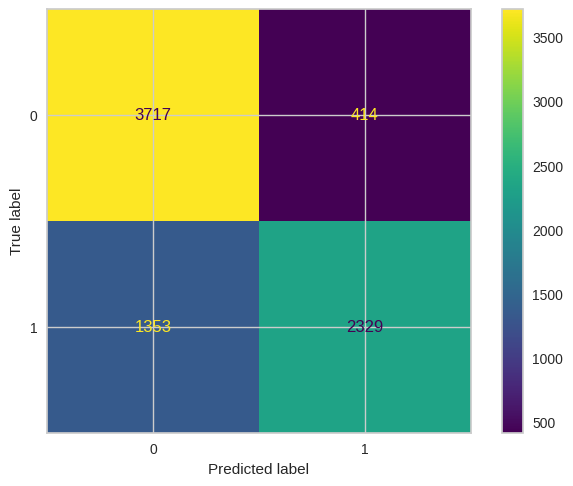

In [136]:
eval_test(x_train,y_train,bestF)

 Recall Score : 0.5550715619166148
 Precision Score : 0.7831431079894644
 F1 Score : 0.649672250546249
 ROC-AUC Score : 0.7658956882707655


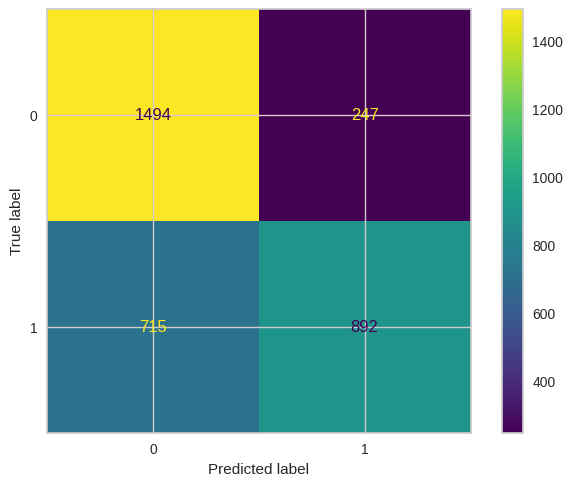

In [138]:
eval_test(x_test,y_test,bestF)

**Observation**

Dari ke 5 model diatas, model yang dipilih adalah Random Forest dengan Hyperparameter Tuning karna memiliki Precision paling tinggi yaitu 78.3%. Model ini mampu menangkap 892 nasabah yang sebenarnya subscribe deposit diantara 1137 nasabah pada data test yang diprediksi subscribe deposit. Dengan kata lain, model mampu meningkatkan conversion rate menjadi 78.3%



Kesimpulan
- Model Prediction
Model mampu menangkap 78,3% nasabah yang sebenarnya subscribe deposit dari semua nasabah yang diprediksi subscribe

14.2 Recommendation
Target Nasabah
1. Kelompok Tua : usia 60+, seorang pensiunan, sudah menikah/belum, minimal jumlah balance 1400 dollar
2. Kelompok Muda : usia 21-30, bekerja di level management, belum menikah, minimal jumlah balance 450 dollar

Pelaksanaan Campaign
1. Melaksanakan campaign pada bulan Januari, Februari, dan Maret (1Q).
2. Melaksanakan campaign via push notification dan email 1x pada minggu pertama disetiap bulan dengan tujuan awareness.
3. Melaksanakan campaign via telepon 1x pada minggu kedua disetiap bulan dengan tujuan conversion.